In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv
/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTest.csv


# <p style="background-color:chocolate;font-family:newtimeroman;font-size:180%;color:white;text-align:center;border-radius:10px 10px;"><b> Multivariate Time Series Analysis & Forecasting with ARIMA, SARIMA, Prophet, RNN, LSTM, GRU
  
## Before we start,

I wanted this notebook to be a go-to guide for time series visualizations and models. From basic techniques to advanced methods, it's all here to help you explore and understand your data better. Enjoy!


## Content:

- About Dataset
- Importing Libraries
- Read Data
- Visualisations/EDA
- Modeling
    - ARIMA
    - SARIMA
    - Prophet
    - RNN
    - LSTM
    - GRU
<br>
- Compare Models
- Conclusion

# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b> </b> 1) About Dataset</p></div>

The Dataset is fully dedicated for the developers who want to train the model on Weather Forecasting for Indian climate. This dataset provides data from 1st January 2013 to 24th April 2017 in the city of Delhi, India. 

The 4 parameters here are:

- meantemp
- humidity
- wind_speed
- meanpressure

# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b> </b> 2) Import Libraries</p></div> 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b> </b> 3) Read Data</p></div> 

In [3]:
# read train data

df = pd.read_csv("/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv", 
                 parse_dates=['date'],  # change to date time format
                 index_col="date")
df

meantemp  humidity  wind_speed  meanpressure
date                                                    
2013-01-01    10.000    84.500       0.000      1015.667
2013-01-02     7.400    92.000       2.980      1017.800
2013-01-03     7.167    87.000       4.633      1018.667
2013-01-04     8.667    71.333       1.233      1017.167
2013-01-05     6.000    86.833       3.700      1016.500
...              ...       ...         ...           ...
2016-12-28    17.217    68.043       3.548      1015.565
2016-12-29    15.238    87.857       6.000      1016.905
2016-12-30    14.095    89.667       6.267      1017.905
2016-12-31    15.053    87.000       7.325      1016.100
2017-01-01    10.000   100.000       0.000      1016.000

[1462 rows x 4 columns]

In [4]:
df.info()  

# no null values
# all float

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [5]:
df.describe().T

count     mean     std    min      25%      50%      75%  \
meantemp     1462.000   25.496   7.348  6.000   18.857   27.714   31.306   
humidity     1462.000   60.772  16.770 13.429   50.375   62.625   72.219   
wind_speed   1462.000    6.802   4.562  0.000    3.475    6.222    9.238   
meanpressure 1462.000 1011.105 180.232 -3.042 1001.580 1008.563 1014.945   

                  max  
meantemp       38.714  
humidity      100.000  
wind_speed     42.220  
meanpressure 7679.333

In [6]:
# creating new features for EDA

df["year"] = df.index.year
df['month'] = df.index.month 
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df["date"] = df.index.date

df.head()

meantemp  humidity  wind_speed  meanpressure  year  month  day  \
date                                                                         
2013-01-01    10.000    84.500       0.000      1015.667  2013      1    1   
2013-01-02     7.400    92.000       2.980      1017.800  2013      1    2   
2013-01-03     7.167    87.000       4.633      1018.667  2013      1    3   
2013-01-04     8.667    71.333       1.233      1017.167  2013      1    4   
2013-01-05     6.000    86.833       3.700      1016.500  2013      1    5   

            dayofweek        date  
date                               
2013-01-01          1  2013-01-01  
2013-01-02          2  2013-01-02  
2013-01-03          3  2013-01-03  
2013-01-04          4  2013-01-04  
2013-01-05          5  2013-01-05

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
 4   year          1462 non-null   int32  
 5   month         1462 non-null   int32  
 6   day           1462 non-null   int32  
 7   dayofweek     1462 non-null   int32  
 8   date          1462 non-null   object 
dtypes: float64(4), int32(4), object(1)
memory usage: 91.4+ KB


# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b> </b> 4) Exploratory Data Analysis and Visualizations</p></div> 

## Creating my own plotly template:

In [8]:
# creating dark gray template(xgridoff_dark) from xgridoff template: 

import plotly.io as pio

# Get the 'xgridoff' template
xgridoff_template = pio.templates['xgridoff']

# Customize the template for dark mode
xgridoff_template.layout.paper_bgcolor = 'rgb(25, 25, 25)'  # very dark gray background
xgridoff_template.layout.plot_bgcolor = 'rgb(35, 35, 35)'  # Dark gray plot background

xgridoff_template.layout.font.color = 'lightgray'  # Light gray font color

# Adjust gridline color and width
xgridoff_template.layout.xaxis.gridcolor = 'rgba(200, 200, 200, 0.3)'  # Light gray with transparency
xgridoff_template.layout.yaxis.gridcolor = 'rgba(200, 200, 200, 0.3)'  # Light gray with transparency
xgridoff_template.layout.xaxis.gridwidth = 1  # Set gridline width
xgridoff_template.layout.yaxis.gridwidth = 1  # Set gridline width

# Update Plotly templates with the modified 'xgridoff' template
pio.templates['xgridoff_dark'] = xgridoff_template

# <div style="color:white;display:inline-block;border-radius:50px;background-color:brown;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>4.1 Line Plots 📈</p></div>

## Plotting features over time (daily):

In [9]:
fig_meantemp = px.line(df, x=df.index, y='meantemp', title='Mean Temperature Over Time')
fig_meantemp.update_layout(template='xgridoff_dark', title_x=0.5, xaxis_title="Date")
fig_meantemp.show()

fig_humidity = px.line(df, x=df.index, y='humidity', title='Humidity Over Time')
fig_humidity.update_layout(template='xgridoff_dark', title_x=0.5, xaxis_title="Date")
fig_humidity.show()

fig_wind_speed = px.line(df, x=df.index, y='wind_speed', title='Wind Speed Over Time')
fig_wind_speed.update_layout(template='xgridoff_dark', title_x=0.5, xaxis_title="Date")
fig_wind_speed.show()

fig_meanpressure = px.line(df, x=df.index, y='meanpressure', title='Mean Pressure Over Time')
fig_meanpressure.update_layout(template='xgridoff_dark', title_x=0.5, xaxis_title="Date")
fig_meanpressure.show()


## Plotting Seasonal Decompositions with plotly:

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.subplots as sp

# Perform seasonal decomposition
result = seasonal_decompose(df['meantemp'], model='additive', period=365)

# Plot the decomposed components
fig = sp.make_subplots(rows=4, cols=1, shared_xaxes=True, 
                       subplot_titles=['Observed', 'Trend', 'Seasonal', 'Residual'])

fig.add_trace(go.Scatter(x=df.index, y=result.observed, mode='lines', name='Observed'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.trend, mode='lines', name='Trend'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.seasonal, mode='lines', name='Seasonal'), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.resid, mode='lines', name='Residual'), row=4, col=1)

fig.update_layout(template= 'xgridoff_dark',height=800, title='Seasonal Decomposition of Mean Temperature')
fig.show()


## Alternative Seasonal Decomposition plot:

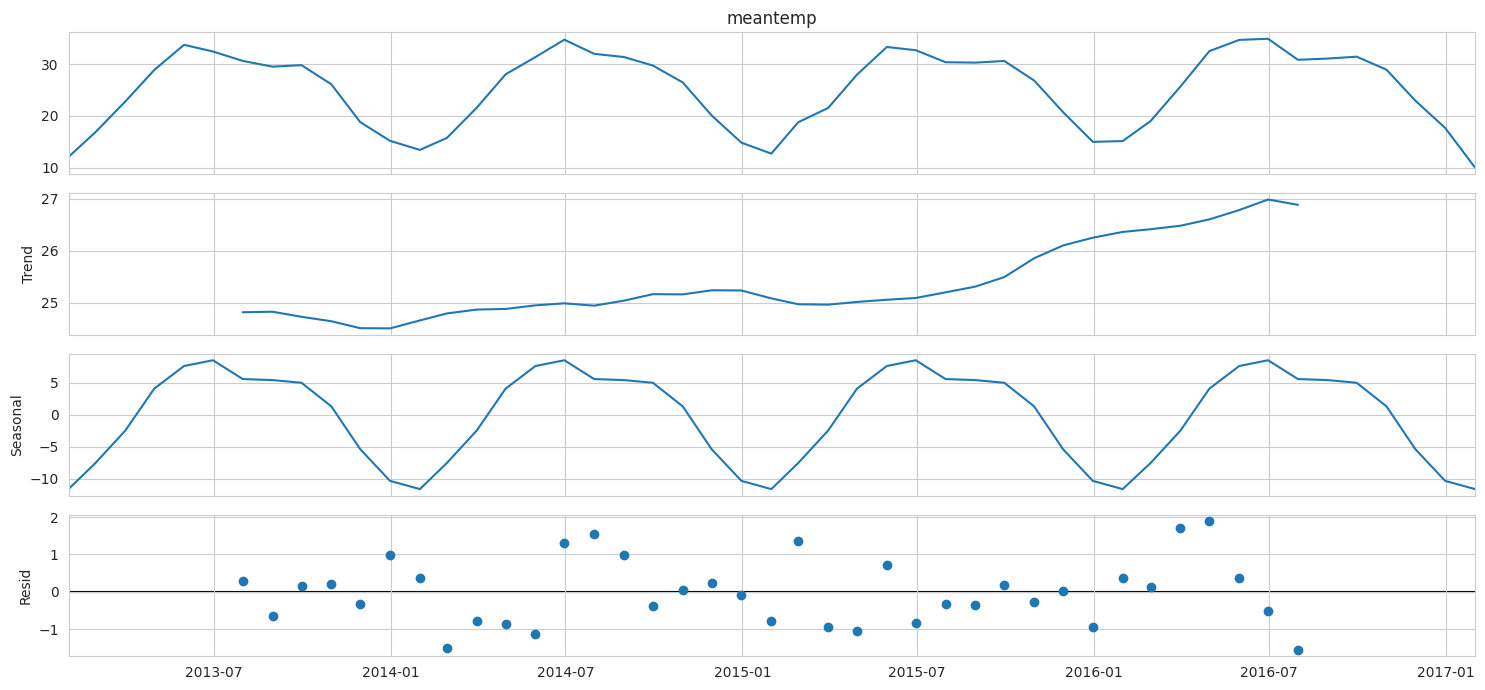

In [11]:
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = [15, 7]

# Select the 'meantemp' column and resample it to monthly frequency
data_monthly = df['meantemp'].resample('M').mean()

# Perform seasonal decomposition for 'meantemp' feature
decomposition = sm.tsa.seasonal_decompose(data_monthly)

# Plot the decomposition
fig = decomposition.plot()
plt.show()

## Plotting Features over time (Month):

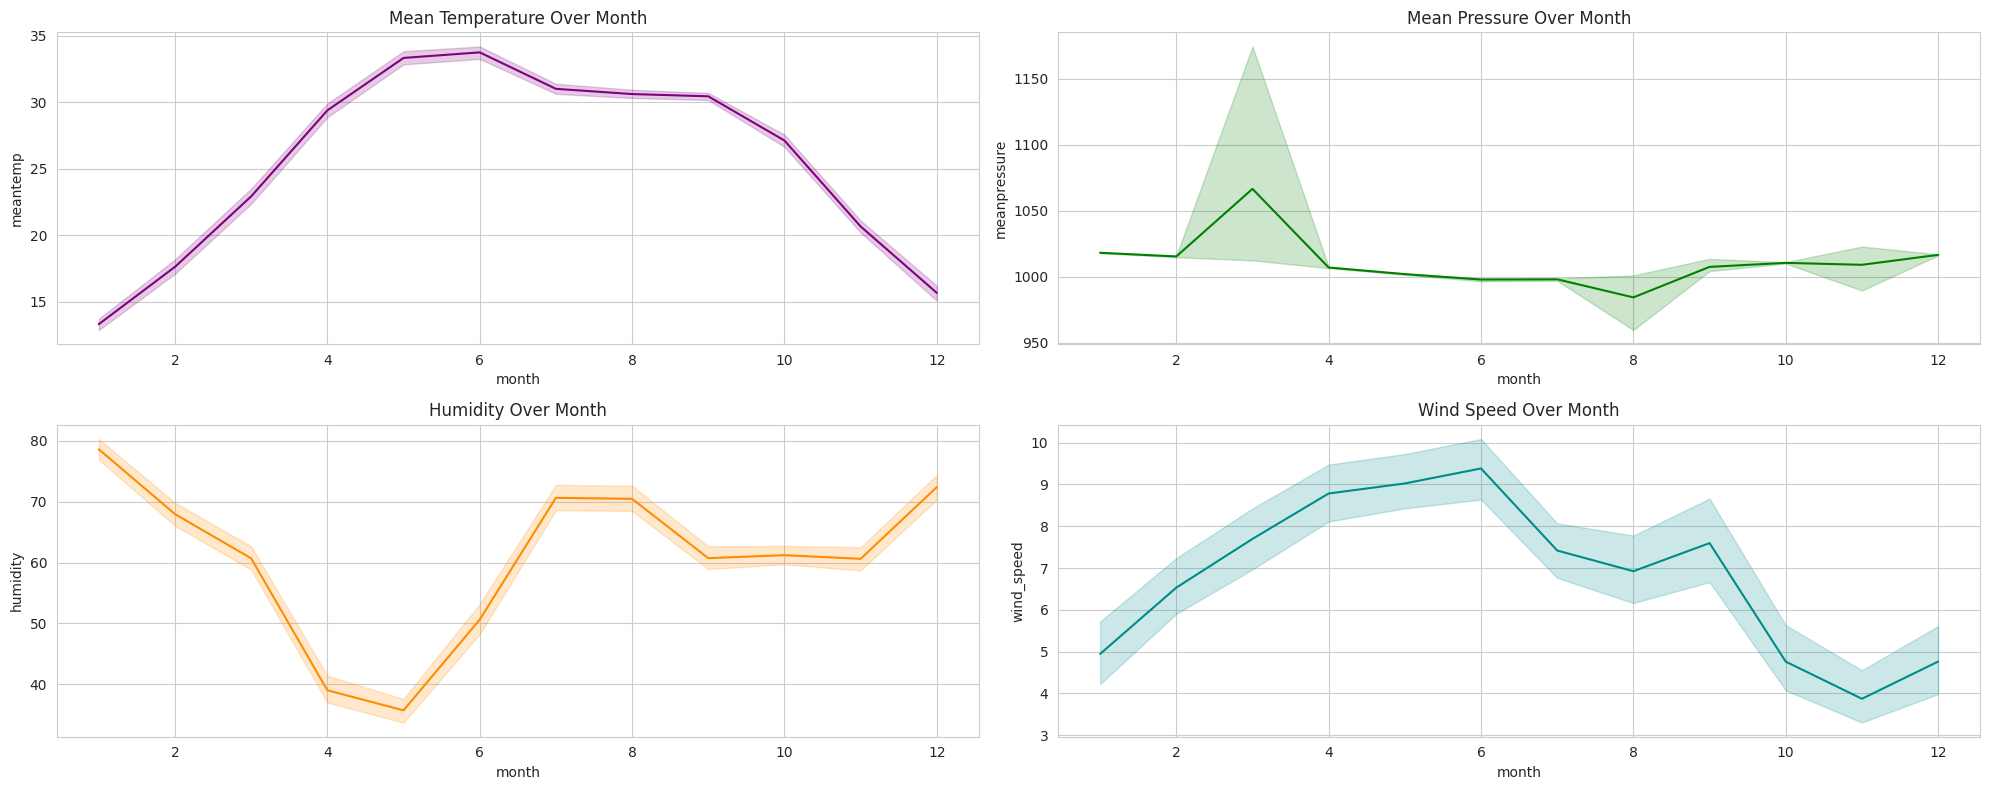

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))

sns.set_style('darkgrid')

# Plot each parameter against the 'month'
sns.lineplot(x='month', y='meantemp', data=df, color='purple', ax=axes[0][0])
axes[0][0].set_title('Mean Temperature Over Month')

sns.lineplot(x='month', y='humidity', data=df, color='darkorange', ax=axes[1][0])
axes[1][0].set_title('Humidity Over Month')

sns.lineplot(x='month', y='meanpressure', data=df, color='green', ax=axes[0][1])
axes[0][1].set_title('Mean Pressure Over Month')

sns.lineplot(x='month', y='wind_speed', data=df, color='darkcyan', ax=axes[1][1])
axes[1][1].set_title('Wind Speed Over Month')

plt.tight_layout()
plt.show()


## Plotting temprature over the years by month:

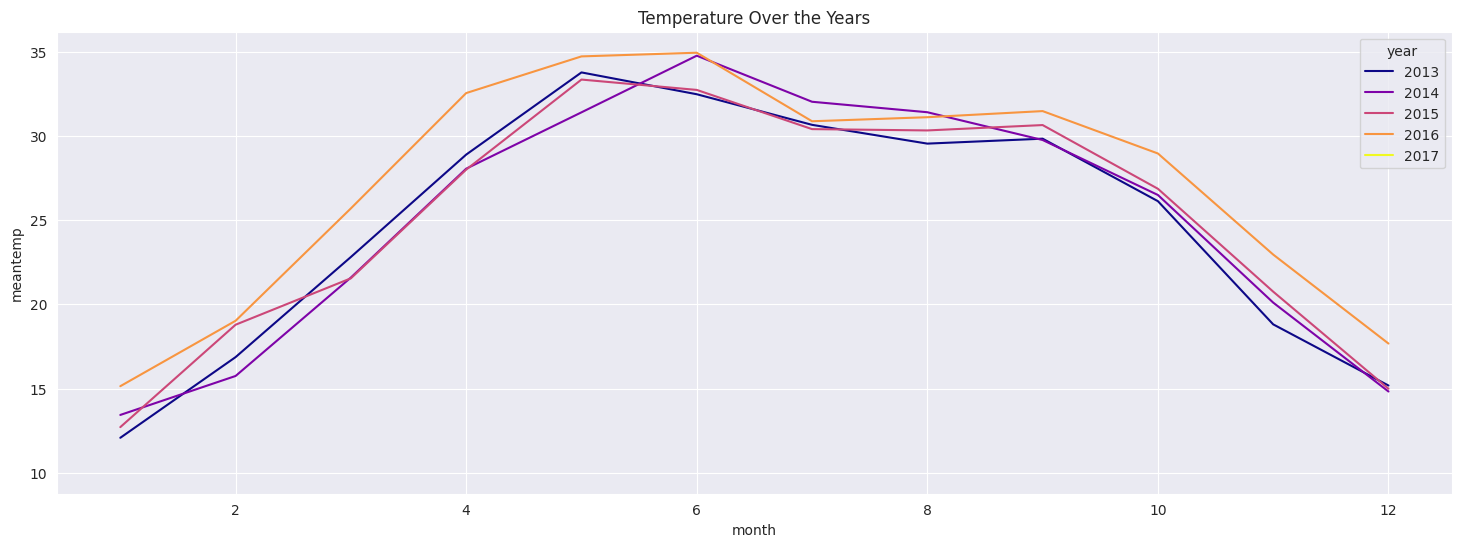

In [13]:
# Create a figure with the specified size
plt.figure(figsize=(18, 6))

sns.set_style('darkgrid')

plt.title("Temperature Over the Years")
sns.lineplot(data=df, x='month', y='meantemp', hue='year', palette='plasma', ci= None);

# <div style="color:white;display:inline-block;border-radius:50px;background-color:brown;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>4.2 Plotting Correlation and Heatmaps</p></div>

### Plotly heatmap color choices: 
 
 'aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance', 'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg', 'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl', 'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric', 'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
             'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
             'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
             'orrd', 'oryel', 'oxy', 'peach', 'phase', 'picnic', 'pinkyl',
             'piyg', 'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn',
             'puor', 'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu',
             'rdgy', 'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar',
             'spectral', 'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn',
             'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid',
             'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr',
             'ylorrd'

## Monthly Average (Temprature, Pressure, Humidity, Wind Speed) Heatmap with Annotations for each year:

In [14]:
import plotly.graph_objects as go

# Function to create a heatmap trace for a given feature
def create_heatmap_trace(data, feature):
    heatmap_data = data.pivot_table(values=feature, index='year', columns='month', aggfunc='mean')
    heatmap_text = heatmap_data.round(2).astype(str).values

    heatmap = go.Heatmap(
        z=heatmap_data.values,
        x=heatmap_data.columns,
        y=heatmap_data.index,
        colorscale='thermal',
        text=heatmap_text,
        hoverinfo='text'
    )

    annotations = []
    for i in range(len(heatmap_data.index)):
        for j in range(len(heatmap_data.columns)):
            annotations.append(
                go.layout.Annotation(
                    x=heatmap_data.columns[j],
                    y=heatmap_data.index[i],
                    text=heatmap_text[i][j],
                    showarrow=False,
                    font=dict(color='white' if heatmap_data.values[i, j] < (heatmap_data.values.max() / 2) else 'black')
                )
            )

    return heatmap, annotations

# Create heatmap traces and annotations for each feature
features = ['meantemp', 'meanpressure', 'humidity', 'wind_speed']
titles = ['Monthly Average Temperature', 'Monthly Average Pressure', 'Monthly Average Humidity', 'Monthly Average Wind Speed']

heatmap_traces = []
annotations_list = []

for feature in features:
    heatmap, annotations = create_heatmap_trace(df, feature)
    heatmap_traces.append(heatmap)
    annotations_list.append(annotations)

# Initialize figure with all traces but only show the first one
fig = go.Figure(data=heatmap_traces)

# Set initial visibility
for i, trace in enumerate(fig.data):
    trace.visible = (i == 0)

fig.update_layout(
    title=titles[0],
    xaxis=dict(nticks=12, title='Month'),
    yaxis=dict(title='Year'),
    annotations=annotations_list[0]
)

# Create dropdown buttons for switching between heatmaps
dropdown_buttons = [
    dict(
        args=[{'visible': [j == i for j in range(len(features))]},
              {'annotations': annotations_list[i],
               'title': titles[i]}],
        label=title,
        method='update'
    )
    for i, title in enumerate(titles)
]

# Add dropdown menu to layout
fig.update_layout(
    updatemenus=[
        dict(
            buttons=dropdown_buttons,
            direction='down',
            showactive=True,
            x=1.15,  # Positioning the button to the right
            y=1.15  # Positioning the button at the top
        )
    ],
    xaxis=dict(title='Month'),
    yaxis=dict(title='Year')
)

fig.show()

## Heatmap with seaborn:

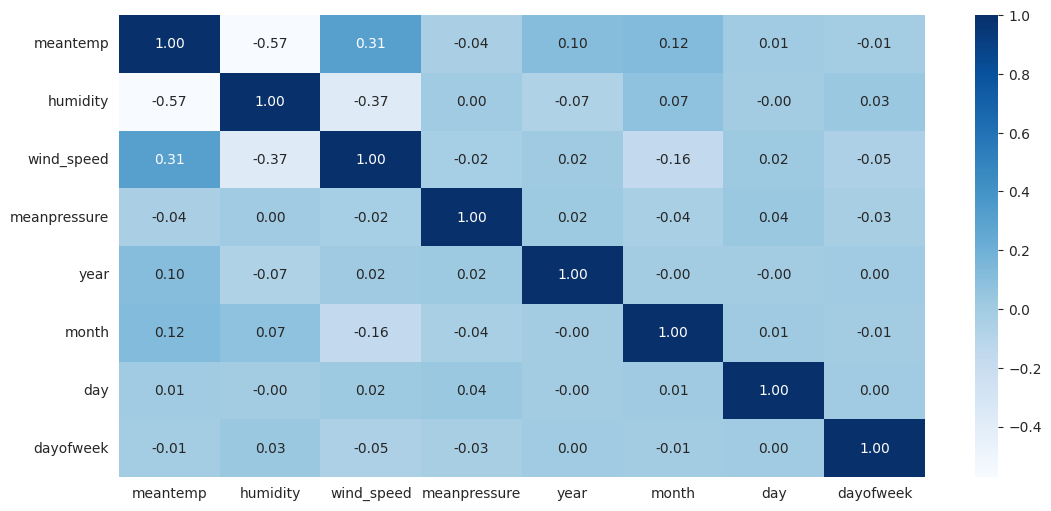

In [15]:
plt.figure(figsize=(13, 6))

sns.heatmap(df.select_dtypes('number').corr(), cmap='Blues', annot=True, fmt='.2f');

## Correlation Barplot with meantemp feature:

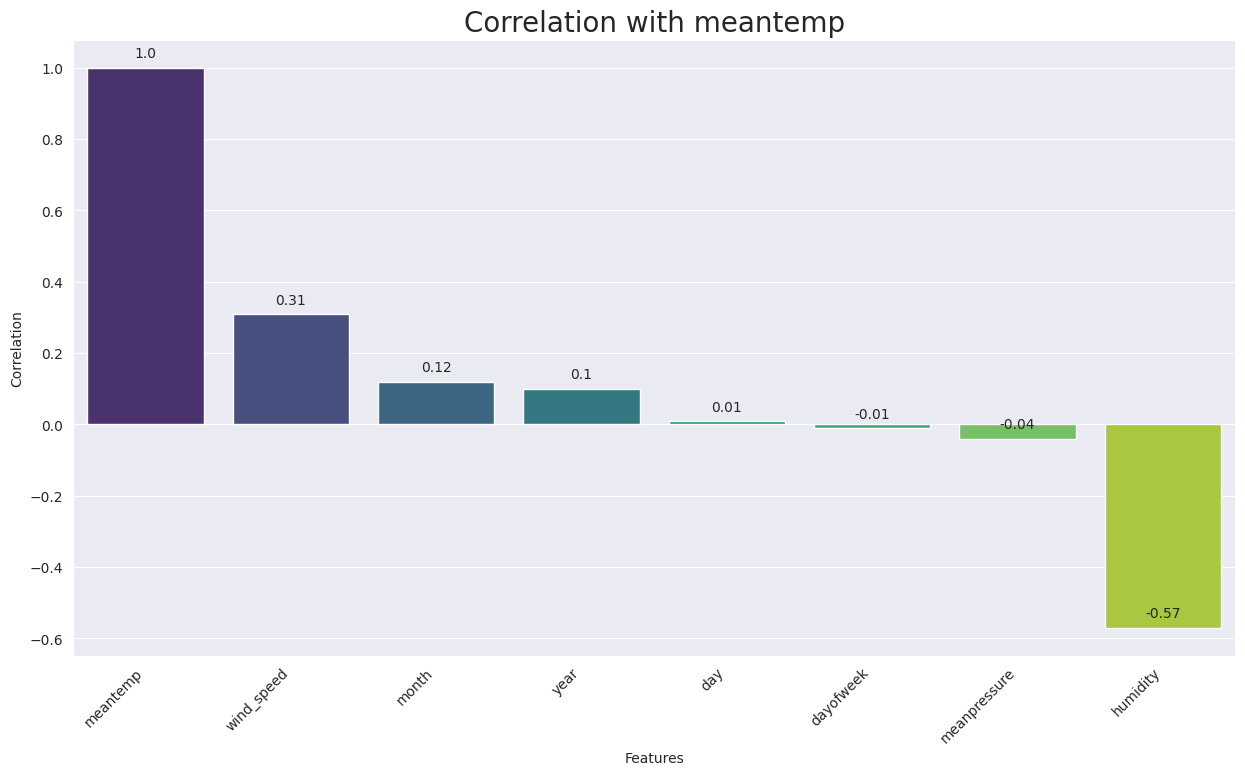

In [16]:
plt.figure(figsize=(15, 8))
sns.set_style('darkgrid')

correlation_matrix = round(df.select_dtypes('number').corr(), 2)

correlation_with_trgt = correlation_matrix['meantemp'].sort_values(ascending=False)

ax = sns.barplot(x=correlation_with_trgt.index, y=correlation_with_trgt, palette='viridis')

plt.title('Correlation with meantemp', size= 20)
plt.xlabel('Features')
plt.ylabel('Correlation')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45, ha='right')
plt.show()

# <div style="color:white;display:inline-block;border-radius:50px;background-color:brown;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>4.3 Box Plots</p></div>

## Monthly Distributions of features:

In [17]:
# Box plots by Month

fig = px.box(df, x='month', y='meantemp', title='Monthly Distribution of Mean Temperatures', template='xgridoff_dark')
fig.show()

fig = px.box(df, x='month', y='humidity', title='Monthly Distribution of Mean Humidity', template='xgridoff_dark')
fig.show()

fig = px.box(df, x='month', y='wind_speed', title='Monthly Distribution of Mean wind_speed', template='xgridoff_dark')
fig.show()

fig = px.box(df, x='month', y='meanpressure', title='Monthly Distribution of Mean Pressure', template='xgridoff_dark')
fig.show()

# <div style="color:white;display:inline-block;border-radius:50px;background-color:brown;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>4.4 Scatterplots</p></div>

In [18]:
# pip install statsmodels

In [19]:
# Increase the size of the figure
fig = px.scatter_matrix(df, 
                        dimensions=['meantemp', 'humidity', 'wind_speed', 'meanpressure'], 
                        title='Scatter Matrix of Weather Parameters')

# Update layout to increase figure size and add outlines to dots
fig.update_layout(
    width=1200,  # Width of the figure
    height=800,  # Height of the figure
    title_x=0.5,  # Title position
    margin=dict(l=50, r=50, t=50, b=50),  # Margin around the plot
    template='xgridoff_dark'
)

# Update marker properties to add outlines
fig.update_traces(marker=dict(line=dict(width=1, color='black')))  # Add outlines to dots

# Show the figure
fig.show()

# <div style="color:white;display:inline-block;border-radius:50px;background-color:brown;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>4.5 Histograms 📊</p></div>

## Histogram with plotly (toggle between plots from the upper right corner):

In [20]:
# Create individual histogram plots with KDE lines and outlines for each feature
fig_meantemp = px.histogram(df, x='meantemp', marginal='rug', title='Histogram Mean Temperature')
fig_humidity = px.histogram(df, x='humidity', marginal='rug', title='Histogram for Humidity')
fig_wind_speed = px.histogram(df, x='wind_speed', marginal='rug', title='Histogram for Wind Speed')

# Update traces to add outlines to the bars
for fig in [fig_meantemp, fig_humidity, fig_wind_speed]:
    fig.update_traces(marker=dict(line=dict(width=1, color='black')))  # Add outlines to bars

# Create subplot layout
fig = go.Figure()

# Add traces to the subplot
fig.add_trace(fig_meantemp['data'][0])  # Add Mean Temperature histogram
fig.add_trace(fig_humidity['data'][0])  # Add Humidity histogram
fig.add_trace(fig_wind_speed['data'][0])  # Add Wind Speed histogram

# Define button list for toggling between plots
buttons = [
    dict(label='Mean Temperature', method='update', args=[{'visible': [True, False, False]}]),
    dict(label='Humidity', method='update', args=[{'visible': [False, True, False]}]),
    dict(label='Wind Speed', method='update', args=[{'visible': [False, False, True]}]),
]

# Add buttons to the figure
fig.update_layout(
    updatemenus=[dict(buttons=buttons, direction='down', showactive=True, x=1.0, y=1.15)],
    title='Histograms with Outlines',
    template='xgridoff_dark'
)

# Show the figure
fig.show()

## Histograms with Seaborn:

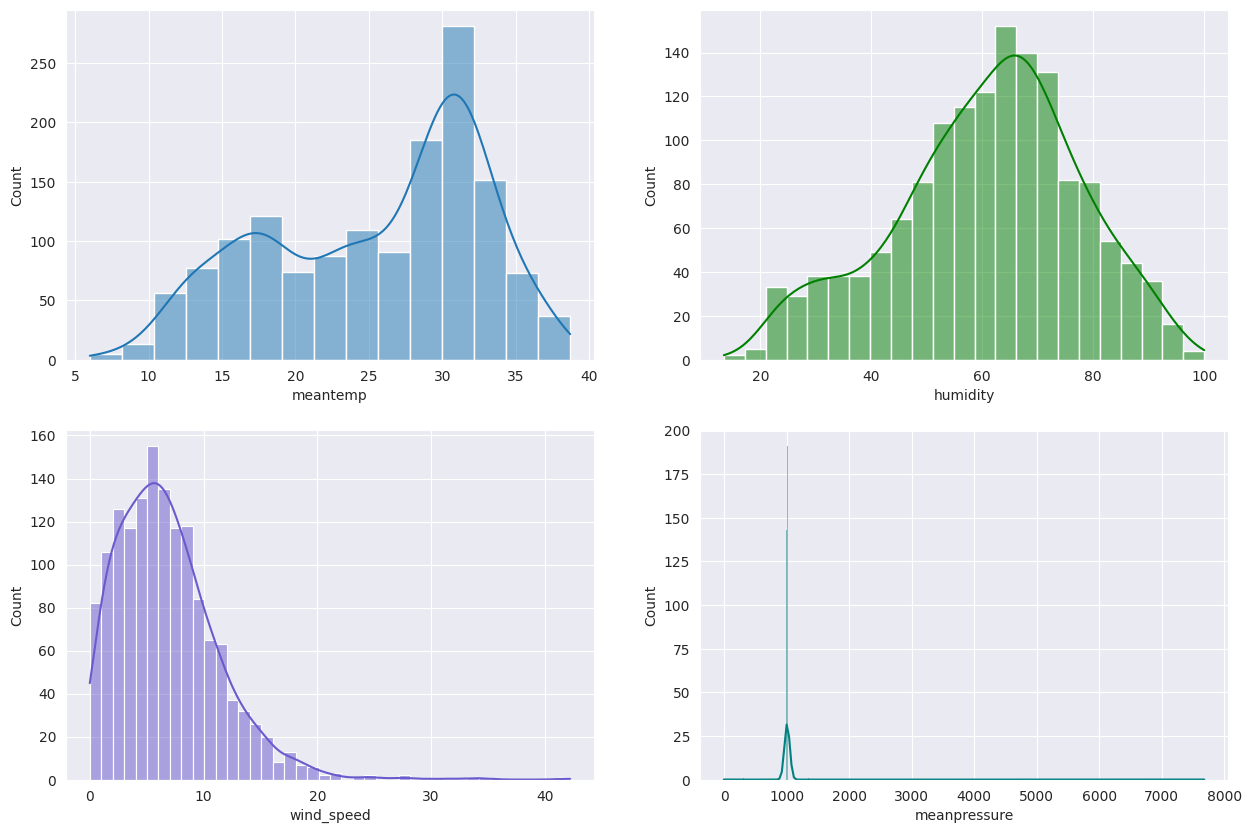

In [21]:
# Reset seaborn style to default
sns.set_style('darkgrid')

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Plot histograms with KDE
sns.histplot(data=df, x="meantemp", ax=ax[0][0], kde=True)

sns.histplot(data=df, x="humidity", ax=ax[0][1], kde=True, color='green')

sns.histplot(data=df, x="wind_speed", ax=ax[1][0], kde=True, color='slateblue')

sns.histplot(data=df, x="meanpressure", ax=ax[1][1], kde=True, color='teal')

# Show the plot
plt.show()


# <div style="color:white;display:inline-block;border-radius:50px;background-color:brown;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>4.6 Polar Plots 🕸</p></div>

reference: https://www.geeksforgeeks.org/8-types-of-plots-for-time-series-analysis-using-python/

This plot has really grown on me lately! I think it's super informative and easy to grasp.

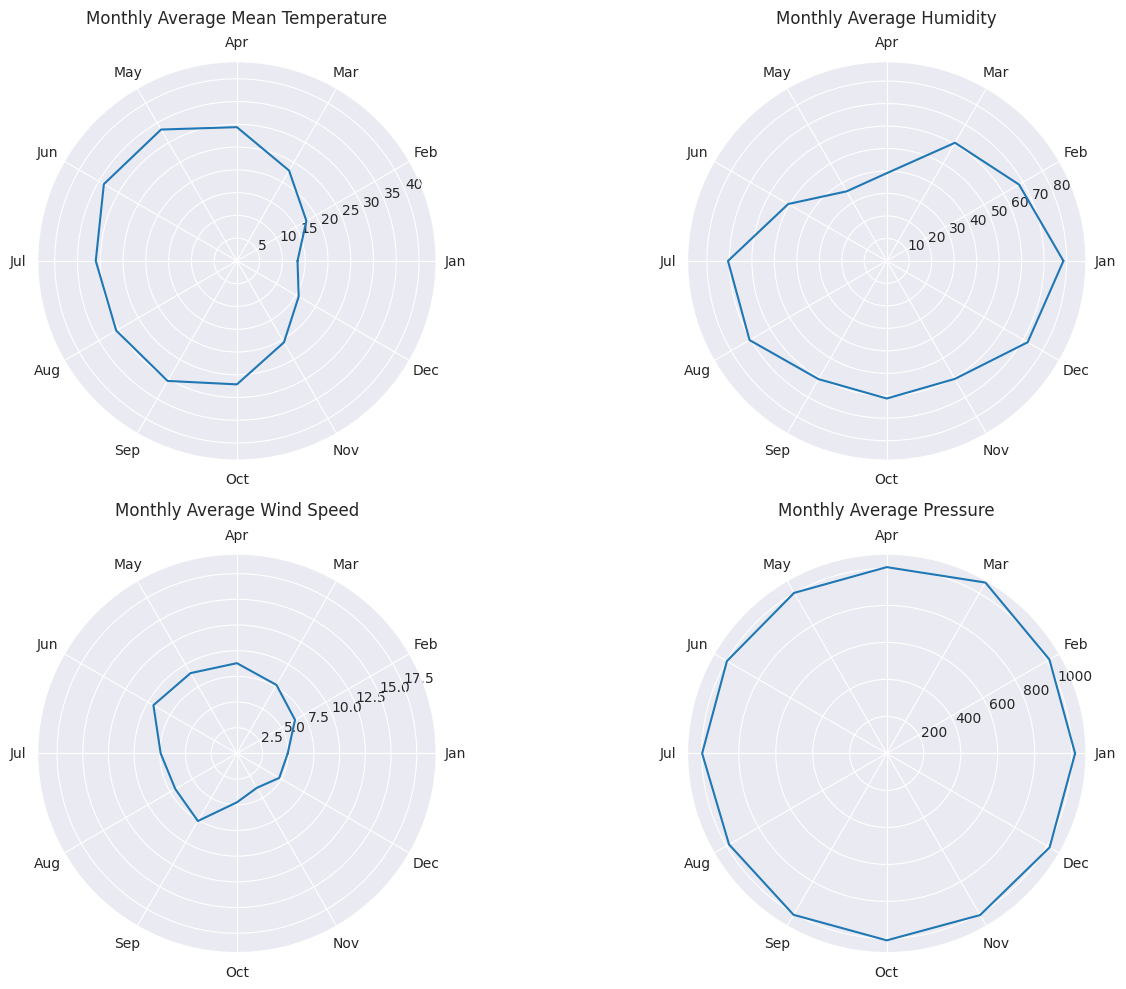

In [22]:
sns.set_style('darkgrid')

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, subplot_kw={'projection': 'polar'}, figsize=(14, 10))

# List of parameters and their titles
parameters = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
titles = ['Monthly Average Mean Temperature', 'Monthly Average Humidity', 
          'Monthly Average Wind Speed', 'Monthly Average Pressure']

for ax, param, title in zip(axs.flatten(), parameters, titles):
    # Grouping the data by month, calculating the average mean value for each month 
    monthly_average = df.groupby('month')[param].mean()
    
    # Polar Plot theta (angle) and radii (length) settings
    theta = np.linspace(0, 2 * np.pi, len(monthly_average), endpoint=False)
    radii = monthly_average.values
    
    # Extend theta and radii to connect the circle
    theta = np.append(theta, theta[0])
    radii = np.append(radii, radii[0])
    
    # Polar Plot
    ax.plot(theta, radii)
    ax.set_title(title, va='bottom')
    ax.set_xticks(theta[:-1])
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                        'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.set_ylim(0, radii.max() + 10)
    
plt.tight_layout()
plt.show()


# mean temprature is higher in summer

In [23]:
# to prevent out of memory error just in case

import gc

del fig

In [25]:
gc.collect()

0

# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b> </b> 5) Feature Selection </p></div>

- After all these visualisations we can say that average pressure (meanpressure) is almost the same in every month and has almost no correlation with meantemp feature, 

I decided to continue with the 3 features for modelling: meantemp(target), humidity, wind_speed

In [26]:
df = df[['meantemp', 'humidity', 'wind_speed']]
df.head()

meantemp  humidity  wind_speed
date                                      
2013-01-01    10.000    84.500       0.000
2013-01-02     7.400    92.000       2.980
2013-01-03     7.167    87.000       4.633
2013-01-04     8.667    71.333       1.233
2013-01-05     6.000    86.833       3.700

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   meantemp    1462 non-null   float64
 1   humidity    1462 non-null   float64
 2   wind_speed  1462 non-null   float64
dtypes: float64(3)
memory usage: 45.7 KB


In [28]:
# Creating a new Dataframe for ARIMA-SARIMA Models
df1 = df.copy()
df1

meantemp  humidity  wind_speed
date                                      
2013-01-01    10.000    84.500       0.000
2013-01-02     7.400    92.000       2.980
2013-01-03     7.167    87.000       4.633
2013-01-04     8.667    71.333       1.233
2013-01-05     6.000    86.833       3.700
...              ...       ...         ...
2016-12-28    17.217    68.043       3.548
2016-12-29    15.238    87.857       6.000
2016-12-30    14.095    89.667       6.267
2016-12-31    15.053    87.000       7.325
2017-01-01    10.000   100.000       0.000

[1462 rows x 3 columns]

# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b> </b> 6) ARIMA-SARIMA Models </p></div>

**ARIMA** : Non-seasonal Autoregressive Integrated Moving Averages

**SARIMA** : Seasonal ARIMA

**SARIMAX** : Seasonal ARIMA with exogenous variables

If a time series, has seasonal patterns, then we need to add seasonal terms and it becomes SARIMA, short for Seasonal ARIMA.

## Steps for building ARIMA-SARIMA models:


#### 1. Check Stationarity: 
Verify the stationarity of each series using tests like ADF (Augmented Dickey-Fuller) and KPSS (Kwiatkowski-Phillips-Schmidt-Shin). Display with ACF and PACF plots.

#### 2. Make Series Stationary: 
Apply transformations to make the target and exogenous variables stationary if needed. Common methods include differencing and log transformations.

#### 3. Model the Relationship: 
Use the stationary series in your ARIMA or SARIMA model.

For ARIMA (AutoRegressive Integrated Moving Average) and SARIMA (Seasonal AutoRegressive Integrated Moving Average) models, it is essential to make the time series data stationary before fitting the model. These models assume that the time series data is stationary, meaning that its statistical properties such as mean, variance, and autocorrelation structure do not change over time. If the data is non-stationary, it can lead to biased parameter estimates and unreliable forecasts.

To make the data stationary, you typically need to remove trends and seasonality. This can be done through techniques like taking differences (for removing trends) and seasonal differencing (for removing seasonality). Once the data is stationary, you can then fit the ARIMA or SARIMA model to the transformed data.

# <div style="color:white;display:inline-block;border-radius:50px;background-color:brown;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>6.1 Check Stationarity</p></div>

## ACF and PACF:

Detailed explanation later on in section 6.3 on how to interpret ACF and PACF:  <a href='#63'> Interpreting ACF and PACF</a>   

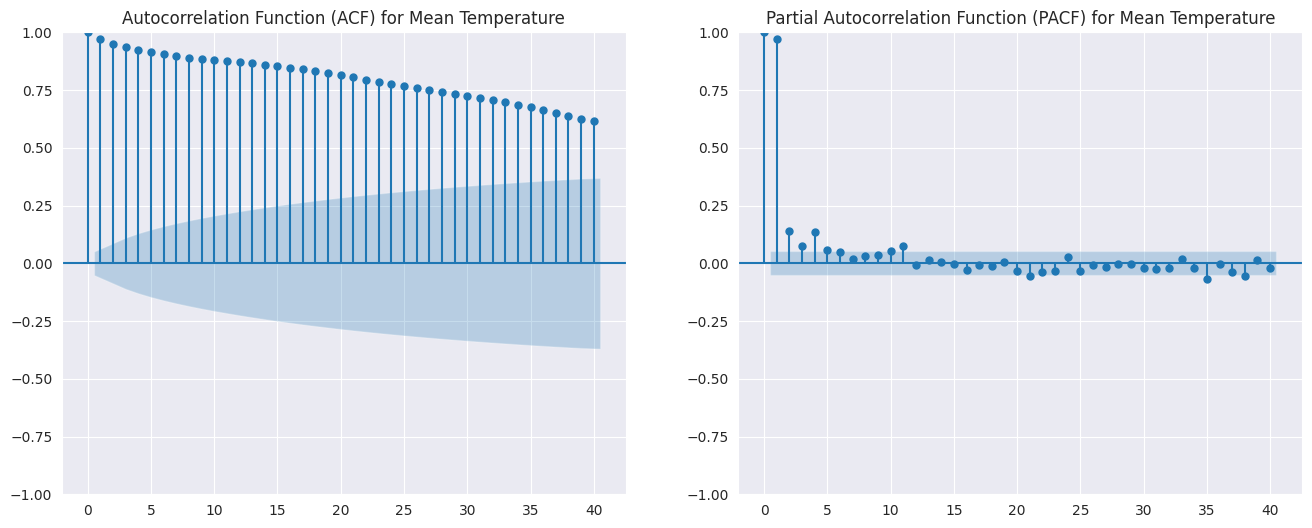

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot ACF
plot_acf(df1['meantemp'], ax=axes[0], lags=40, title='Autocorrelation Function (ACF) for Mean Temperature')

# Plot PACF
plot_pacf(df1['meantemp'], ax=axes[1], lags=40, title='Partial Autocorrelation Function (PACF) for Mean Temperature')

plt.show()

The Series does not seem stationary, ACF has to become 0 at some point. But we are not certainly sure yet. 

Let's confirm with the ADF and KPSS tests..

## ADF and KPSS

To confirm the visual assessments of stationarity (due to trend and seasonality), the Dickey-Fuller and KPSS hypothesis tests are used:

1. Augmented Dickey-Fuller Test (ADF)

    - Null Hypothesis H0: The series is not stationary
    - Alternative Hypothesis H1: The series is stationary

2. Kwiatkowski-Phillips-Schmidt-Shin Test (KPSS)

    - Null Hypothesis H0: The series is stationary
    - Alternative Hypothesis H1: The series is not stationary

### Function for ADF and KPSS Tests:

In [30]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss

def check_stationarity(series):
    print(f'\n___________________Checking Stationarity for: {series.name}___________________\n')
    
    # ADF Test
    adf_test = adfuller(series.values)
    print('ADF Test:\n')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

    if (adf_test[1] <= 0.05) & (adf_test[4]['5%'] > adf_test[0]):
        print("\u001b[32mSeries is Stationary (ADF Test)\u001b[0m")
    else:
        print("\x1b[31mSeries is Non-stationary (ADF Test)\x1b[0m")
    
    print('\n' + '-'*50 + '\n')
    
    # KPSS Test
    kpss_test = kpss(series.values, regression='c', nlags='auto')
    print('KPSS Test:\n')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('Critical Values:')
    for key, value in kpss_test[3].items():
        print('\t%s: %.3f' % (key, value))

    if kpss_test[1] > 0.05:
        print("\u001b[32mSeries is Stationary (KPSS Test)\u001b[0m")
    else:
        print("\x1b[31mSeries is Non-stationary (KPSS Test)\x1b[0m")


In [31]:
# Check initial stationarity for each feature

check_stationarity(df1['meantemp'])  # target is non stationary!!
check_stationarity(df1['humidity'])
check_stationarity(df1['wind_speed'])


___________________Checking Stationarity for: meantemp___________________

ADF Test:

ADF Statistic: -2.021069
p-value: 0.277412
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Series is Non-stationary (ADF Test)

--------------------------------------------------

KPSS Test:

KPSS Statistic: 0.187864
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Series is Stationary (KPSS Test)

___________________Checking Stationarity for: humidity___________________

ADF Test:

ADF Statistic: -3.675577
p-value: 0.004470
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Series is Stationary (ADF Test)

--------------------------------------------------

KPSS Test:

KPSS Statistic: 0.091737
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Series is Stationary (KPSS Test)

___________________Checking Stationarity for: wind_speed___________________

ADF Test:

ADF Statistic: -3.838097
p-value: 0.002541
Critical Values:
	1%: 

/tmp/ipykernel_33/2216627552.py:24: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/tmp/ipykernel_33/2216627552.py:24: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/tmp/ipykernel_33/2216627552.py:24: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




# <div style="color:white;display:inline-block;border-radius:50px;background-color:brown;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>6.2 Apply differencing to make the series stationary</p></div>

## Methods to make a time series stationary:

Among the methods to make a time series stationary, differencing and detrending are two of the most common:

- Differencing: 
Taking the difference between consecutive observations helps remove trends and make the series stationary. This method is simple and often effective, especially for time series with a linear trend.

- Detrending: 
Removing a trend from the time series data is another common approach. This can involve fitting a regression model to the data and subtracting the trend component, or using other techniques like polynomial regression or moving averages to remove trend effects.

These methods are widely used because they are relatively straightforward to implement and can effectively address trend-related non-stationarity in time series data.

#### Other methods:

- Seasonal Differencing: Similar to differencing, but instead of taking differences between consecutive observations, take differences between observations separated by the seasonal period.

- Transformation: Apply mathematical transformations to stabilize the variance or make the data more linear. Common transformations include taking the logarithm, square root, or Box-Cox transformation.

- Smoothing: Apply moving averages or exponential smoothing to remove noise and smooth out the data.

- Decomposition: Decompose the time series into its trend, seasonal, and residual components, and then remove the trend and seasonal components.

- Regression: Fit a regression model with exogenous variables (if available) to the time series data and remove the effect of these variables.

These methods can be applied individually or in combination, depending on the characteristics of the time series and the specific goals of the analysis. Experimentation and domain knowledge often play a crucial role in selecting the most appropriate method(s) for making a time series stationary.

In [32]:
check_stationarity(df1['meantemp'])

df1['meantemp_diff'] = df1['meantemp'].diff().fillna(0)  # diff() default is 1st degree differencing 

print('\n\n############################### After Differencing ###############################\n\n')
check_stationarity(df1['meantemp_diff']);


___________________Checking Stationarity for: meantemp___________________

ADF Test:

ADF Statistic: -2.021069
p-value: 0.277412
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Series is Non-stationary (ADF Test)

--------------------------------------------------

KPSS Test:

KPSS Statistic: 0.187864
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Series is Stationary (KPSS Test)


############################### After Differencing ###############################



___________________Checking Stationarity for: meantemp_diff___________________

ADF Test:

ADF Statistic: -16.294070
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Series is Stationary (ADF Test)

--------------------------------------------------

KPSS Test:

KPSS Statistic: 0.189493
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Series is Stationary (KPSS Test)


/tmp/ipykernel_33/2216627552.py:24: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/tmp/ipykernel_33/2216627552.py:24: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




# <a id='63'> <div style="color:white;display:inline-block;border-radius:50px;background-color:brown;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>6.3 Interpreting ACF and PACF  </p></div>

I highly recommend you to check out this notebook about how to interpret ACF and PACF: https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf

Difference between ACF and PACF video explanation: https://www.youtube.com/watch?v=DeORzP0go5I&list=PLvcbYUQ5t0UHOLnBzl46_Q6QKtFgfMGc3&index=2

### 1. Autocorrelation Function (ACF):

* The ACF measures the correlation between a time series and its lagged values at different lag intervals.
* On the x-axis, you have the lag or time interval.
* The y-axis represents the correlation coefficient, which ranges from -1 to 1.
* Positive values indicate positive correlation (similar movement in the same direction), while negative values indicate negative correlation (opposite movement).
* The shaded region represents the 95% confidence interval. Correlation values outside this region are considered statistically significant.
* Significant spikes in the ACF plot indicate potential seasonal patterns or trends in the data.

### 2. Partial Autocorrelation Function (PACF):

* The PACF measures the correlation between a time series and its lagged values, controlling for the effects of other lags in between.
* It helps identify the direct relationship between a data point and its lagged values, excluding the influence of other lags.
* Similar to the ACF plot, the x-axis represents the lag or time interval, and the y-axis represents the correlation coefficient.
* Significant spikes in the PACF plot indicate the number of lag terms to include in autoregressive models (AR).
* Interpreting these plots helps identify potential patterns, trends, and seasonality in the time series data, providing insights for modeling and forecasting.
<br>

If there are clear patterns like seasonality in the ACF and PACF plots, it suggests that the data exhibits periodic behavior. This implies that there are recurring patterns or cycles in the data over time, which can be important for understanding and forecasting future values.

---------------

### ❔ Lagged Values ❔

Lagged values, in the context of time series analysis, refer to the values of a variable (or series) at previous time points. When we say "lagged by k time units," it means we're looking at the value of the variable k time points in the past.

For example, if we have daily temperature data for a city, and we want to analyze the temperature at time t (today) with respect to the temperature at time t-1 (yesterday), we're looking at a lag of 1 day. Similarly, if we're interested in the temperature at time t with respect to the temperature two days ago (t-2), we're looking at a lag of 2 days.

Lagged values are essential in time series analysis for understanding temporal dependencies, identifying patterns, and building forecasting models. The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots help visualize the correlation between the original time series and its lagged values at different time intervals.


### ❔ Ideal ACF and PACF plots ❔

#### ACF Plot:

* We ideally want the autocorrelation values to start from high positive values and gradually decrease as the lag increases.
* The autocorrelation values should approach zero as the lag becomes large.
* A gradual decay in autocorrelation indicates that the past observations have some influence on the current observation but that influence diminishes as we move further into the past.

#### PACF Plot:

* We ideally want partial autocorrelation values to start from high values at lag 1 and then drop off sharply to zero or close to zero for subsequent lags.
* Significant spikes at lower lags (especially lag 1) indicate a strong direct relationship between the current observation and past observations.
* A sudden drop-off in partial autocorrelation beyond a certain lag indicates that the effects of intermediate observations are explained by more recent observations.
* These ideal patterns in ACF and PACF plots help in identifying the order of autoregressive (AR) and moving average (MA) terms in time series models such as ARIMA (Autoregressive Integrated Moving Average).

------------

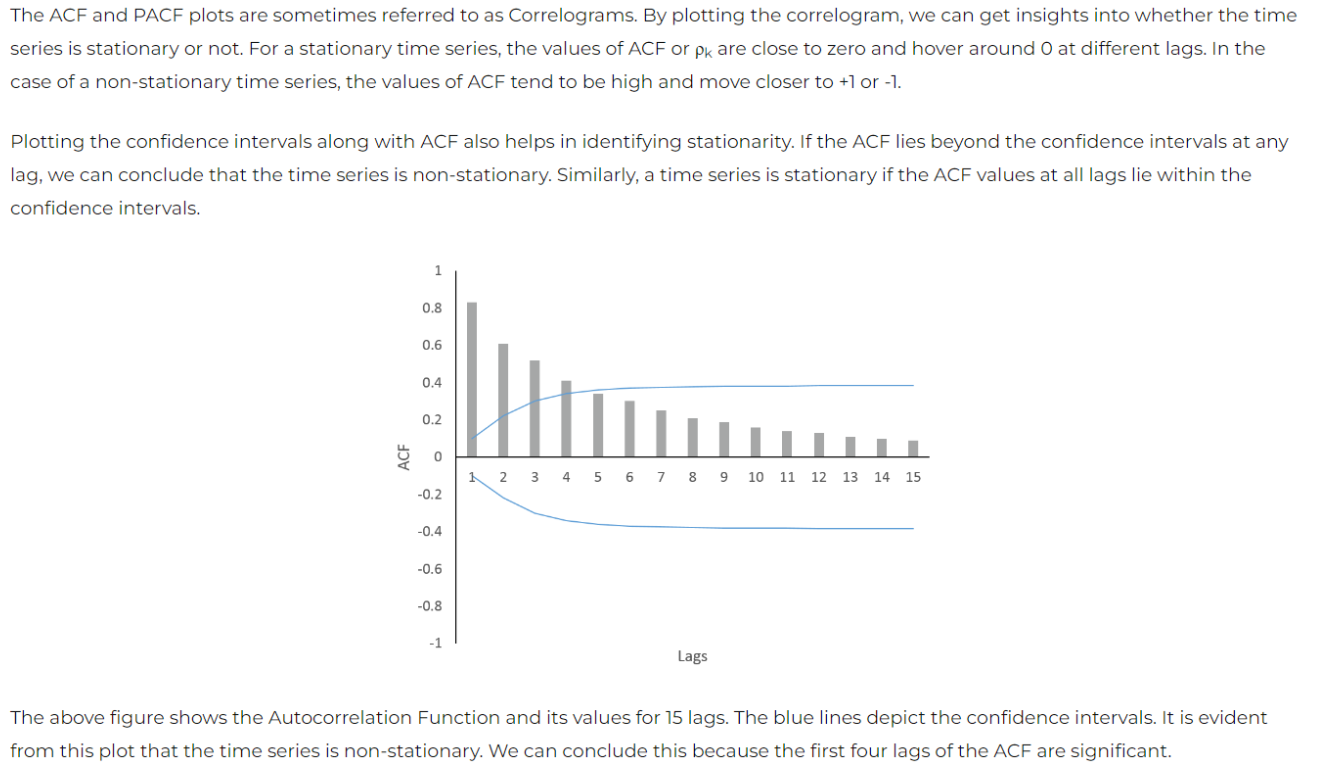

Sources:

https://spureconomics.com/autocorrelation-function-and-stationarity/#:~:text=The%20ACF%20and%20PACF%20plots%20are%20helpful%20in%20determining%20the,models%20to%20decide%20their%20structure.

https://spureconomics.com/interpreting-acf-and-pacf-plots/

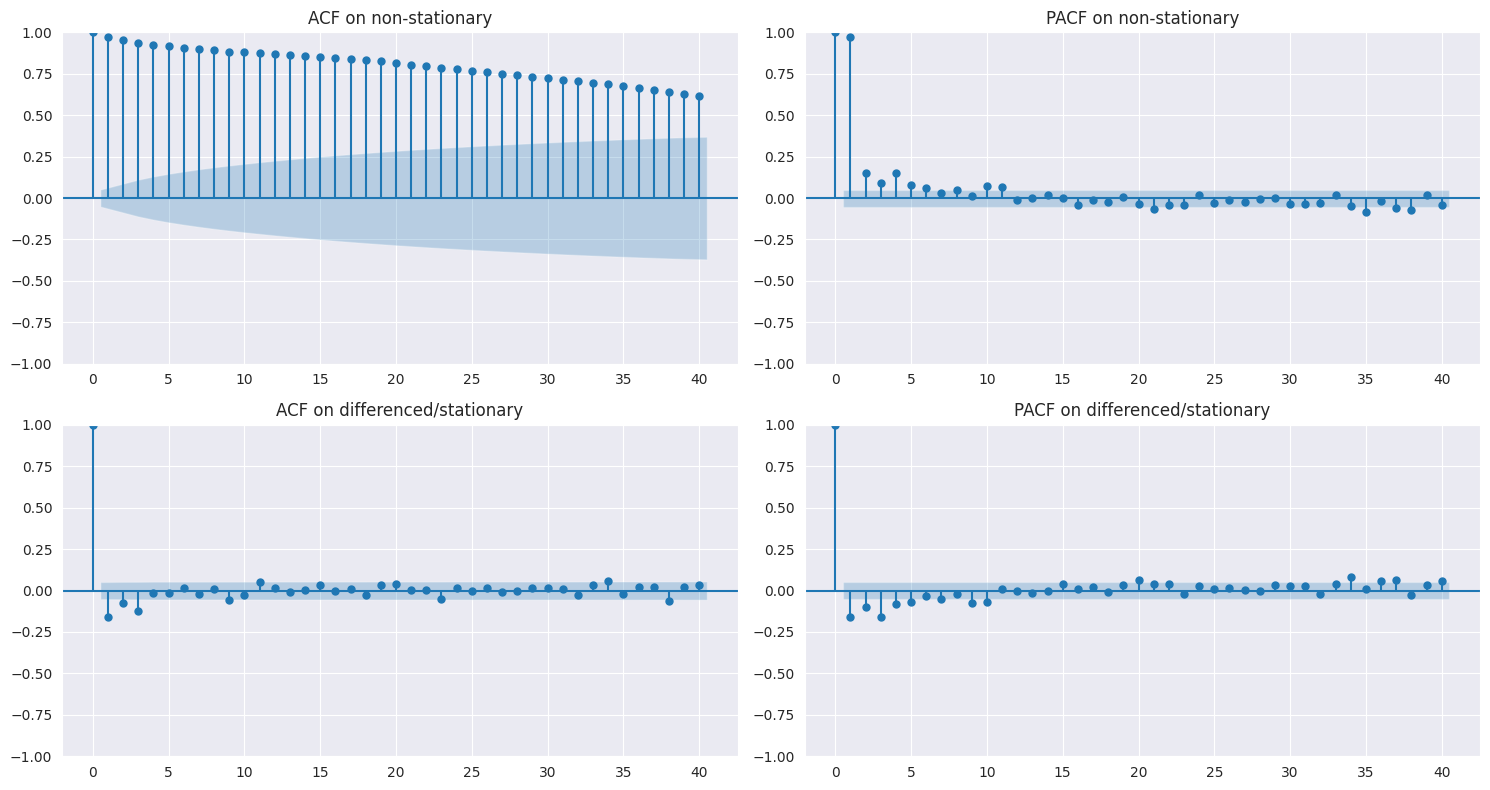

In [33]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

plot_acf(df1['meantemp'], lags=40, ax=ax[0, 0], title='ACF on non-stationary')
plot_pacf(df1['meantemp'], lags=40, ax=ax[0, 1], method='ols', title='PACF on non-stationary')

plot_acf(df1['meantemp_diff'], lags=40, ax=ax[1, 0], title='ACF on differenced/stationary')
plot_pacf(df1['meantemp_diff'], lags=40, ax=ax[1, 1], method='ols', title='PACF on differenced/stationary')

plt.tight_layout()
plt.show()

After differencing, the series has become stationary

# <div style="color:white;display:inline-block;border-radius:50px;background-color:brown;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>6.3 ARIMA-SARIMA with Daily data</p></div>

## The meaning of p, d and q

source: https://www.kaggle.com/code/prashant111/arima-model-for-time-series-forecasting#4.-AR-and-MA-models-

- p: 
    - p is the order of the Auto Regressive (AR) term. It refers to the number of lags of Y to be used as predictors.
<br>
- d:

    - The term Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, as we know, work best when the predictors are not correlated and are independent of each other. So we need to make the time series stationary.

    - The most common approach to make the series stationary is to difference it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed.

    - The value of d, therefore, is the minimum number of differencing needed to make the series stationary. If the time series is already stationary, then d = 0.
<br>
- q: 
    - q is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   meantemp       1462 non-null   float64
 1   humidity       1462 non-null   float64
 2   wind_speed     1462 non-null   float64
 3   meantemp_diff  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [35]:
# Split the data into training and testing sets
train_size = int(len(df1) * 0.8)
train, test = df1.iloc[:train_size], df1.iloc[train_size:]

In [36]:
display(f'Train shape: {train.shape}')
display(train.head())

display(f'Test shape: {test.shape}')
test.head()

'Train shape: (1169, 4)'

meantemp  humidity  wind_speed  meantemp_diff
date                                                     
2013-01-01    10.000    84.500       0.000          0.000
2013-01-02     7.400    92.000       2.980         -2.600
2013-01-03     7.167    87.000       4.633         -0.233
2013-01-04     8.667    71.333       1.233          1.500
2013-01-05     6.000    86.833       3.700         -2.667

'Test shape: (293, 4)'

meantemp  humidity  wind_speed  meantemp_diff
date                                                     
2016-03-15    24.067    58.933       8.647          1.692
2016-03-16    23.938    53.750      10.881         -0.129
2016-03-17    26.312    50.312       6.844          2.375
2016-03-18    26.188    61.250       6.713         -0.125
2016-03-19    26.786    61.857       3.579          0.598

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Test MSE: 65.649


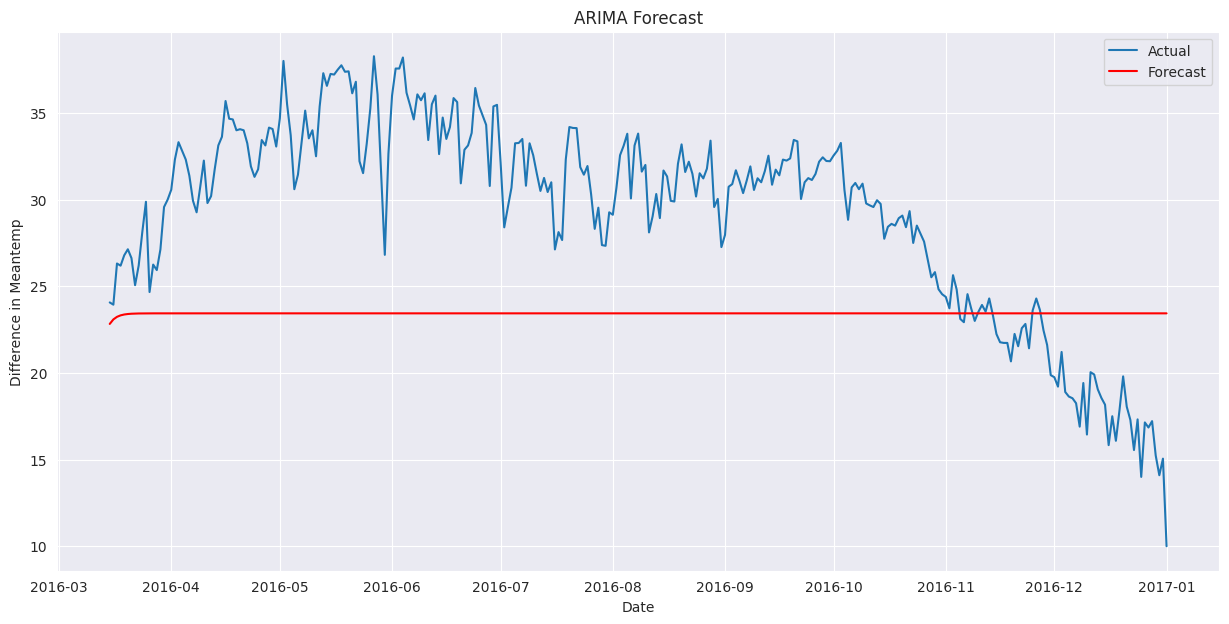

In [37]:
# ARIMA

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Fit the ARIMA model
arima_model = ARIMA(train['meantemp'], order=(1,1,1))  # ARIMA(p,d,q)
arima_model_fit = arima_model.fit()

# Make predictions
arima_pred = arima_model_fit.forecast(steps=len(test))

# Calculate error
error = mean_squared_error(test['meantemp'], arima_pred)
print('Test MSE: %.3f' % error)

# Plot the results
plt.plot(test.index, test['meantemp'], label='Actual')
plt.plot(test.index, arima_pred, color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Difference in Meantemp')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()


### We have seen that simple ARIMA Model is not suitable for this data (There is seasonality in our data)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.77593D+00    |proj g|=  2.29377D-01

At iterate    5    f=  1.69582D+00    |proj g|=  6.20860D-02

At iterate   10    f=  1.67340D+00    |proj g|=  1.52269D-01

At iterate   15    f=  1.65954D+00    |proj g|=  4.74866D-02

At iterate   20    f=  1.64909D+00    |proj g|=  3.38477D-02

At iterate   25    f=  1.64178D+00    |proj g|=  2.22603D-02

At iterate   30    f=  1.64086D+00    |proj g|=  1.20122D-02

At iterate   35    f=  1.64071D+00    |proj g|=  2.22525D-03

At iterate   40    f=  1.64067D+00    |proj g|=  6.45695D-03

At iterate   45    f=  1.64066D+00    |proj g|=  4.85442D-04

At iterate   50    f=  1.64066D+00    |proj g|=  3.51099D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Test MSE: 42.81410562919816
Test R²: -0.337


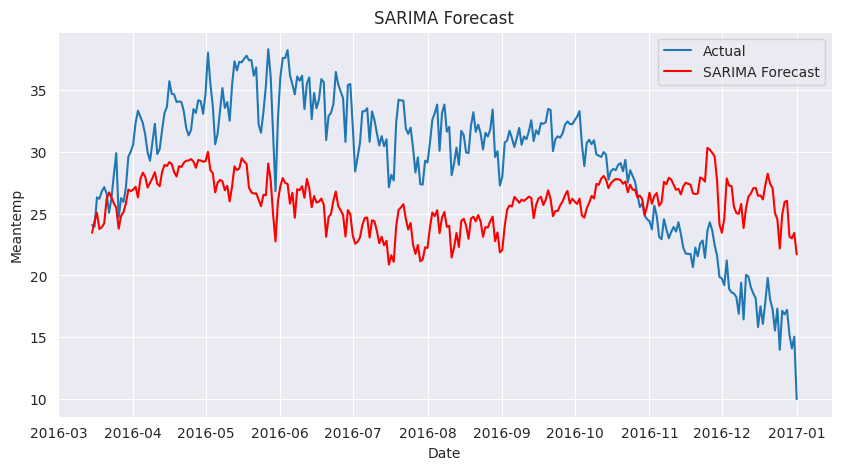

In [38]:
# SARIMAX

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model parameters
order = (1, 1, 6)  # Non-seasonal order (p, d, q)
seasonal_order = (1, 1, 1, 7)  # Seasonal order (P, D, Q, S)  

# Fit the SARIMA model
sarima_model = SARIMAX(endog=train['meantemp'], exog=train[['humidity', 'wind_speed']],
                       order=order, seasonal_order=seasonal_order)
sarima_model_fit = sarima_model.fit()

# Make predictions
sarima_pred = sarima_model_fit.predict(start=test.index[0], end=test.index[-1],
                                            exog=test[['humidity', 'wind_speed']])

# Calculate error
mse = mean_squared_error(test['meantemp'], sarima_pred)
r2 = r2_score(test['meantemp'], sarima_pred)
print('Test MSE:', mse)
print('Test R²: %.3f' % r2)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(test.index, test['meantemp'], label='Actual')
plt.plot(test.index, sarima_pred, color='red', label='SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19854D+00    |proj g|=  6.36405D-01


 This problem is unconstrained.



At iterate    5    f=  2.04739D+00    |proj g|=  8.24676D-01

At iterate   10    f=  1.96229D+00    |proj g|=  1.26746D-01

At iterate   15    f=  1.92115D+00    |proj g|=  1.32997D-01

At iterate   20    f=  1.90098D+00    |proj g|=  6.05635D-02

At iterate   25    f=  1.89712D+00    |proj g|=  1.12610D-02

At iterate   30    f=  1.89611D+00    |proj g|=  8.62725D-02

At iterate   35    f=  1.89486D+00    |proj g|=  3.04502D-02

At iterate   40    f=  1.89256D+00    |proj g|=  1.42851D-01

At iterate   45    f=  1.89186D+00    |proj g|=  1.06551D-02

At iterate   50    f=  1.89184D+00    |proj g|=  4.96526D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Test MSE: 23.0690100924936
Test R²: 0.279


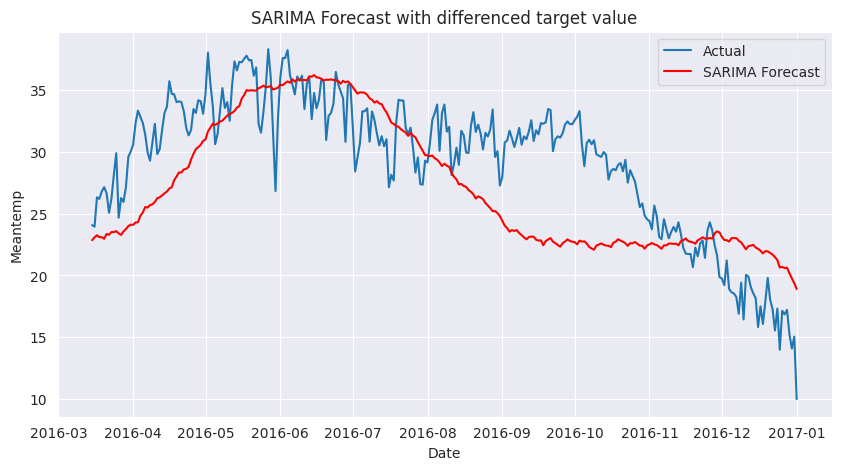

In [39]:
# SARIMAX with differenced target (will not be compared with other models)

# Fit the SARIMA model
sarima_model = SARIMAX(endog=train['meantemp_diff'], exog=train[['humidity', 'wind_speed']],
                       order=order, seasonal_order=seasonal_order)
sarima_model_fit = sarima_model.fit()

# Make predictions
sarima_pred_diff = sarima_model_fit.predict(start=test.index[0], end=test.index[-1],
                                            exog=test[['humidity', 'wind_speed']])

# Convert differenced predictions back to the original scale
# Start the conversion from the last known original value in the training set
last_original_value = train['meantemp'].iloc[-1]
sarima_pred = sarima_pred_diff.cumsum() + last_original_value

# Calculate error
mse = mean_squared_error(test['meantemp'], sarima_pred)
r2 = r2_score(test['meantemp'], sarima_pred)
print('Test MSE:', mse)
print('Test R²: %.3f' % r2)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(test.index, test['meantemp'], label='Actual')
plt.plot(test.index, sarima_pred, color='red', label='SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.title('SARIMA Forecast with differenced target value')
plt.legend()
plt.show()

For daily predictions, using a seasonality parameter of 365 is impractical as it significantly increases the model's computation time. Instead, we will aggregate the data to monthly values for predictions.

# <div style="color:white;display:inline-block;border-radius:50px;background-color:brown;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>6.4 ARIMA-SARIMA with Monthly data</p></div>

In [40]:
monthly_df = df1.resample('M').mean()

# Split the data into training and testing sets
train_size = int(len(monthly_df) * 0.8)
m_train, m_test = monthly_df.iloc[:train_size], monthly_df.iloc[train_size:]

Test MSE: 64.547


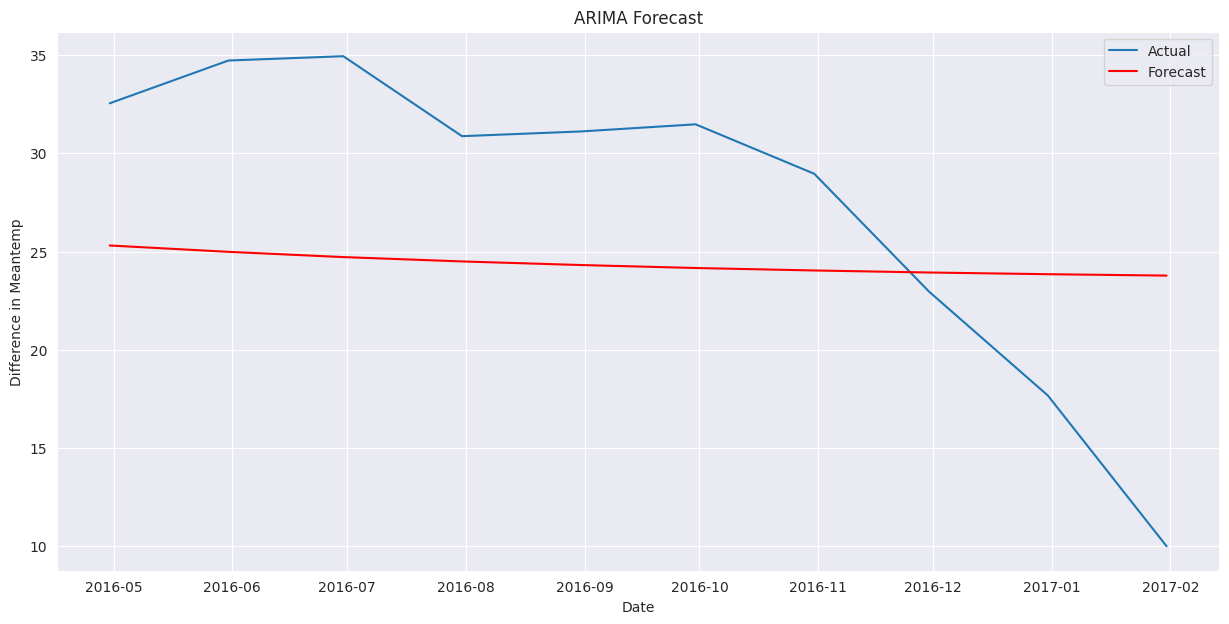

In [41]:
# ARIMA

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Fit the ARIMA model
arima_model = ARIMA(m_train['meantemp'], order=(1,0,0))  # ARIMA(p,d,q)
arima_model_fit = arima_model.fit()

# Make predictions
arima_pred_m = arima_model_fit.forecast(steps=len(m_test))

# Calculate error
error = mean_squared_error(m_test['meantemp'], arima_pred_m)
print('Test MSE: %.3f' % error)

# Plot the results
plt.plot(m_test.index, m_test['meantemp'], label='Actual')
plt.plot(m_test.index, arima_pred_m, color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Difference in Meantemp')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12790D+00    |proj g|=  2.09276D-01


 This problem is unconstrained.



At iterate    5    f=  1.08131D+00    |proj g|=  1.43331D-01

At iterate   10    f=  1.06712D+00    |proj g|=  3.11931D-03

At iterate   15    f=  1.06709D+00    |proj g|=  1.14387D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     17     20      1     0     0   8.980D-06   1.067D+00
  F =   1.0670888837816555     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Test MSE: 3.768047473600869
Test R²: 0.937


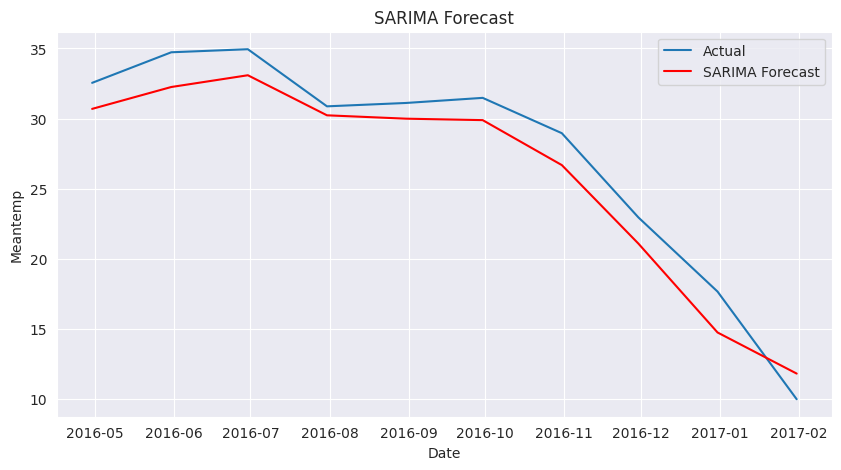

In [42]:
# SARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model parameters
order = (1, 0, 0)  # Non-seasonal order (p, d, q)
seasonal_order = (2, 1, 1, 12)  # Seasonal order (P, D, Q, S)  

# Fit the SARIMA model
sarima_model = SARIMAX(endog=m_train['meantemp'], exog=m_train[['humidity', 'wind_speed']],
                       order=order, seasonal_order=seasonal_order)
sarima_model_fit = sarima_model.fit()

# Make predictions
sarima_pred_m = sarima_model_fit.predict(start=m_test.index[0], end=m_test.index[-1],
                                            exog=m_test[['humidity', 'wind_speed']])

# Calculate error
mse = mean_squared_error(m_test['meantemp'], sarima_pred_m)
r2 = r2_score(m_test['meantemp'], sarima_pred_m)
print('Test MSE:', mse)
print('Test R²: %.3f' % r2)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(m_test.index, m_test['meantemp'], label='Actual')
plt.plot(m_test.index, sarima_pred_m, color='red', label='SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

I think figuring out the p, d, and q parameters are quite hard from ACF and PACF plots.

So we will try forecasting with auto_arima

# <div style="color:white;display:inline-block;border-radius:50px;background-color:brown;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>6.5 Modeling with auto_arima (monthly prediction) </p></div>

### Auto ARIMA:

The auto_arima function will automatically search through combinations of these parameters within the specified ranges to find the best-fitting model based on criteria like AIC (Akaike Information Criterion). By setting these maximum values (max_p, max_d, max_q, max_P, max_D, max_Q), you are specifying the bounds within which auto_arima will search.

https://www.webscale.com/engineering-education/multivariate-time-series-using-auto-arima/#:~:text=Auto%20ARIMA%20automatically%20generates%20the,model%20using%20the%20ARIMA%20model

In [47]:
# pip install pmdarima

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=104.420, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=100.592, Time=0.12 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=104.176, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=106.408, Time=0.05 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=2.07 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=100.462, Time=0.08 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=1.59 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.70 sec
 ARIMA(

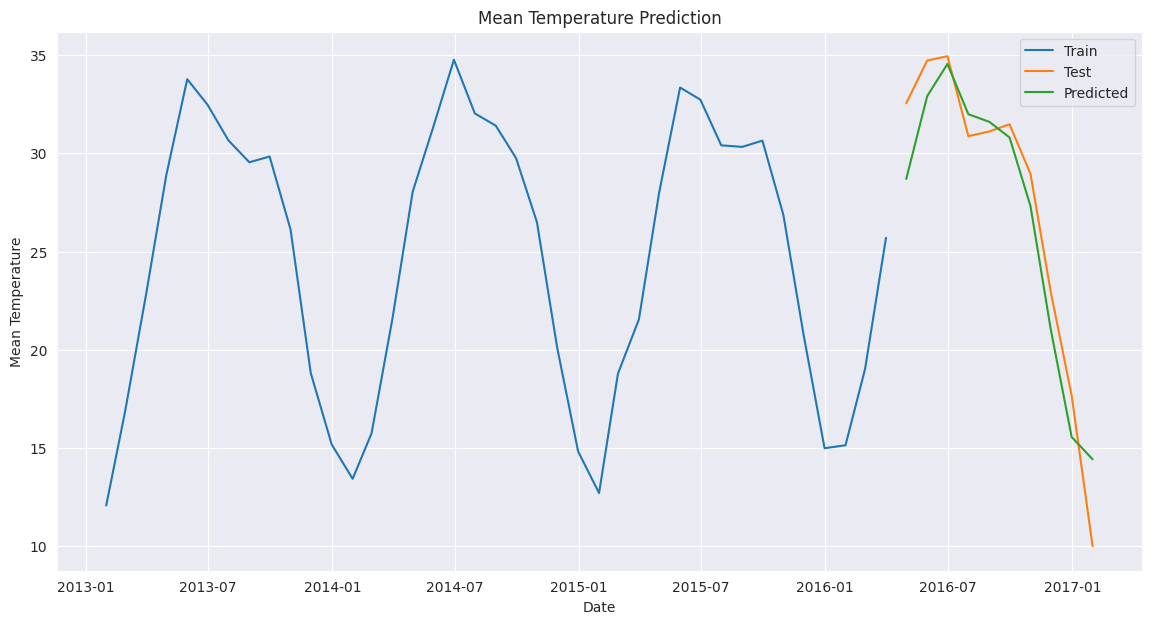

In [45]:
from pmdarima import auto_arima

# Fit the model on the training data with optimized settings for monthly seasonality
model = auto_arima(
    m_train['meantemp'], 
    seasonal=True, 
    m=12,
    max_p=7, 
    max_d=1, 
    max_q=3, 
    max_P=3, 
    max_D=1, 
    max_Q=2,
    trace=True,    # To print the progress of the fitting
    error_action='ignore',  # Ignore potential errors
    suppress_warnings=True,  # Suppress warnings
    n_jobs=-1  # Use all available CPU cores
)

# Print model summary
print(model.summary())

# Make predictions
n_periods = len(m_test)
auto_arima_pred = model.predict(n_periods=n_periods)

# Calculate R^2 and RMSE
r2 = r2_score(m_test['meantemp'], auto_arima_pred)
rmse = np.sqrt(mean_squared_error(m_test['meantemp'], auto_arima_pred))

print(f'R^2 score: {r2}')
print(f'RMSE: {rmse}')

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(m_train.index, m_train['meantemp'], label='Train')
plt.plot(m_test.index, m_test['meantemp'], label='Test')
plt.plot(m_test.index, auto_arima_pred, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Prediction')
plt.show()

# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b> </b> 7) Prophet Model </p></div>

Prophet algorithm works with the "ds" and "y" variables as inputs. We will adjust our training and test sets accordingly.

- ds: This column contains the dates. In Prophet, the dates in this column are typically in daily frequency, although this is not mandatory. The dates can be in the format YYYY-MM-DD (e.g., "2021-01-01") or in timestamp format.

- y: This column contains the observed values you want to predict. For example, if you want to forecast the daily number of visitors to a website, the "y" column will contain these visitor numbers.

------

- yhat: This is the main value predicted by the model. In other words, it is the value that your model predicts the time series will be for a specific "ds" (date) value.

- yhat_lower and yhat_upper: These values represent the uncertainty interval of the predictions. Prophet takes into account uncertainty when making predictions, estimating with high confidence that the true value will fall within this range. For example, if yhat_lower is 50 and yhat_upper is 60, it means that the model confidently predicts that the true value will be within this range.

In [46]:
df.head()

meantemp  humidity  wind_speed
date                                      
2013-01-01    10.000    84.500       0.000
2013-01-02     7.400    92.000       2.980
2013-01-03     7.167    87.000       4.633
2013-01-04     8.667    71.333       1.233
2013-01-05     6.000    86.833       3.700

# <div style="color:white;display:inline-block;border-radius:50px;background-color:brown;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>7.1 Prophet Model without other features (humidity, wind_speed)</p></div>

05:04:30 - cmdstanpy - INFO - Chain [1] start processing
05:04:30 - cmdstanpy - INFO - Chain [1] done processing


Test MSE: 7.621
Test R²: 0.762


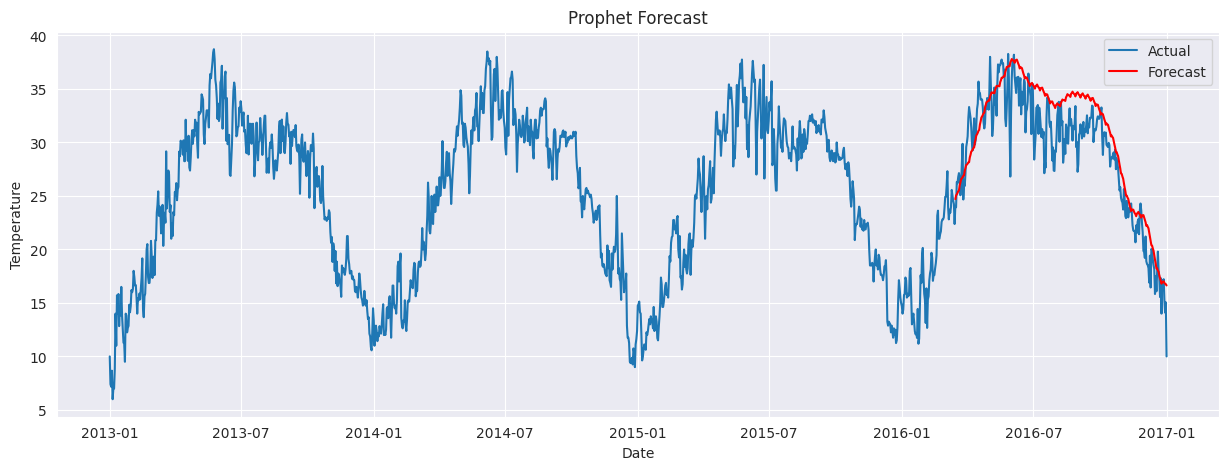

In [48]:
from prophet import Prophet

# Rename columns for Prophet
df_prophet = df.reset_index().rename(columns={'date': 'ds', 'meantemp': 'y'})

# Split the data into training and testing sets
train_size = int(len(df_prophet) * 0.8)
p_train, p_test = df_prophet.iloc[:train_size], df_prophet.iloc[train_size:]

# Initialize and fit the Prophet model with additional features
prop_model = Prophet()

prop_model.fit(p_train)

# Make future dataframe and include additional features
future = prop_model.make_future_dataframe(periods=len(p_test), freq='D')

# Make predictions
forecast = prop_model.predict(future)

# Extract the forecasted values for the test period
predicted = forecast[['ds', 'yhat']].set_index('ds').loc[p_test['ds']]

# Calculate error and R²
mse = mean_squared_error(p_test['y'], predicted['yhat'])
r2 = r2_score(p_test['y'], predicted['yhat'])
print('Test MSE: %.3f' % mse)
print('Test R²: %.3f' % r2)

# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual')
plt.plot(predicted.index, predicted['yhat'], color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Prophet Forecast')
plt.legend()
plt.show()

# <div style="color:white;display:inline-block;border-radius:50px;background-color:brown;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>7.2 Prophet Model using the entire dataset</p></div>

05:04:32 - cmdstanpy - INFO - Chain [1] start processing
05:04:33 - cmdstanpy - INFO - Chain [1] done processing


Test MSE: 2.951
Test R²: 0.908


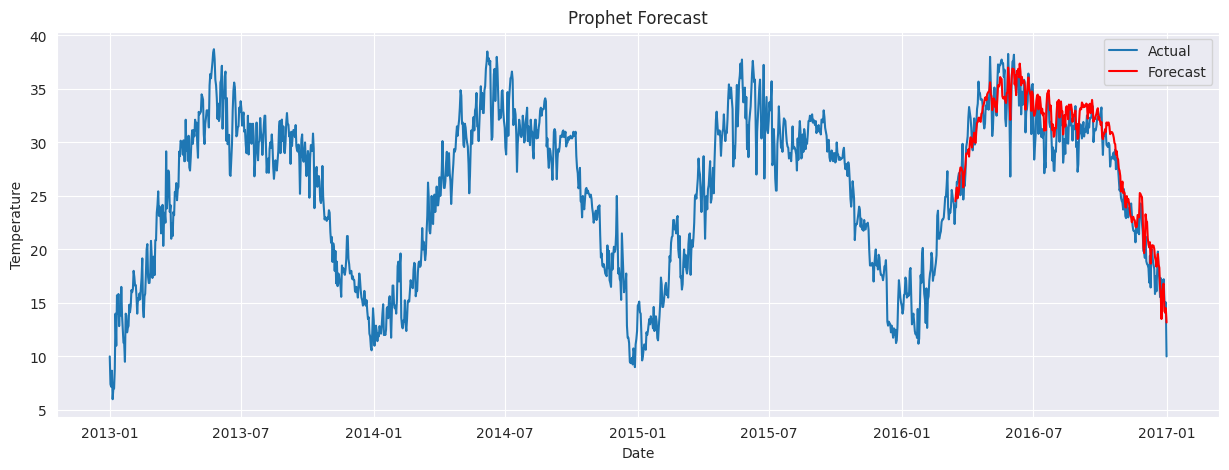

In [49]:
# Rename columns for Prophet
df_prophet = df.reset_index().rename(columns={'date': 'ds', 'meantemp': 'y'})

# Add additional features
df_prophet['humidity'] = df['humidity'].values
df_prophet['wind_speed'] = df['wind_speed'].values

# Split the data into training and testing sets
train_size = int(len(df_prophet) * 0.8)
p_train, p_test = df_prophet.iloc[:train_size], df_prophet.iloc[train_size:]


# Initialize and fit the Prophet model with additional features
prop_model = Prophet()
prop_model.add_regressor('humidity')
prop_model.add_regressor('wind_speed')

prop_model.fit(p_train)


# Make future dataframe and include additional features
future = prop_model.make_future_dataframe(periods=len(p_test), freq='D')
future['humidity'] = df['humidity'].values
future['wind_speed'] = df['wind_speed'].values

# Make predictions
forecast = prop_model.predict(future)

# Extract the forecasted values for the test period
predicted = forecast[['ds', 'yhat']].set_index('ds').loc[p_test['ds']]


# Calculate error and R²
mse = mean_squared_error(p_test['y'], predicted['yhat'])
r2 = r2_score(p_test['y'], predicted['yhat'])
print('Test MSE: %.3f' % mse)
print('Test R²: %.3f' % r2)

# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual')
plt.plot(predicted.index, predicted['yhat'], color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Prophet Forecast')
plt.legend()
plt.show()

### Colclusion:

- The Prophet model achieved an R² score of ~91% when using the entire dataset with all features, indicating a high level of accuracy.

- In contrast, the R² score dropped to 76% when the model was trained without the additional features.

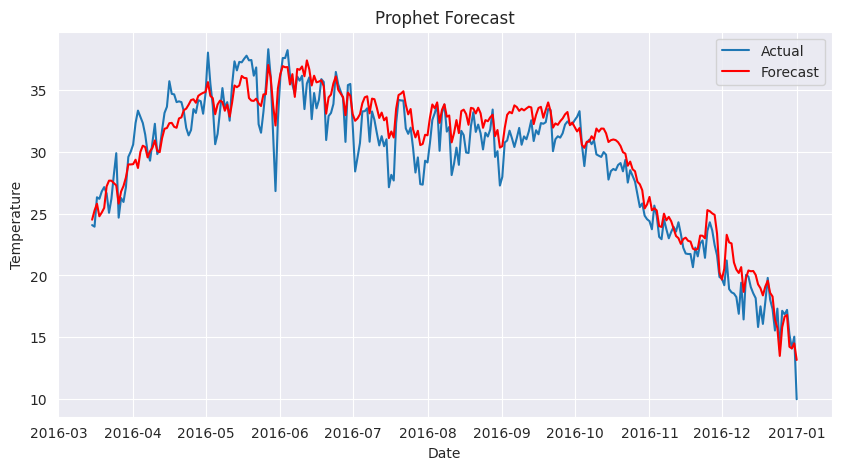

In [50]:
# Looking closer to the results

plt.figure(figsize=(10, 5))
plt.plot(p_test['ds'], p_test['y'], label='Actual')
plt.plot(predicted.index, predicted['yhat'], color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Prophet Forecast')
plt.legend()
plt.show()

In [51]:
display(df_prophet.head()) # actual data

display(predicted.head()) # predicted values of p_test

ds      y  humidity  wind_speed
0 2013-01-01 10.000    84.500       0.000
1 2013-01-02  7.400    92.000       2.980
2 2013-01-03  7.167    87.000       4.633
3 2013-01-04  8.667    71.333       1.233
4 2013-01-05  6.000    86.833       3.700

yhat
ds               
2016-03-15 24.504
2016-03-16 25.245
2016-03-17 25.792
2016-03-18 24.778
2016-03-19 25.083

## Confidence Interval:

In [52]:
forecast.head(3)  # forecast data

ds  trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2013-01-01 23.935       8.365      12.458       23.935       23.935   
1 2013-01-02 23.942       7.445      11.602       23.942       23.942   
2 2013-01-03 23.948       7.967      12.118       23.948       23.948   

   additive_terms  additive_terms_lower  additive_terms_upper  \
0         -13.518               -13.518               -13.518   
1         -14.367               -14.367               -14.367   
2         -13.933               -13.933               -13.933   

   extra_regressors_additive  extra_regressors_additive_lower  \
0                     -2.369                           -2.369   
1                     -3.348                           -3.348   
2                     -2.832                           -2.832   

   extra_regressors_additive_upper  humidity  humidity_lower  humidity_upper  \
0                           -2.369    -2.617          -2.617          -2.617   
1                           -3.348    -3.484          -3.484          -3.484   
2                           -2.832    -2.906          -2.906          -2.906   

   weekly  weekly_lower  weekly_upper  wind_speed  wind_speed_lower  \
0   0.060         0.060         0.060       0.248             0.248   
1   0.101         0.101         0.101       0.136             0.136   
2  -0.086        -0.086        -0.086       0.074             0.074   

   wind_speed_upper  yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0             0.248 -11.209       -11.209       -11.209                 0.000   
1             0.136 -11.121       -11.121       -11.121                 0.000   
2             0.074 -11.015       -11.015       -11.015                 0.000   

   multiplicative_terms_lower  multiplicative_terms_upper   yhat  
0                       0.000                       0.000 10.417  
1                       0.000                       0.000  9.574  
2                       0.000                       0.000 10.015

In [53]:
# Adding the actual temprature values to the forecast data

forecast['Actual_temp'] = df_prophet['y']
forecast.head(3)

ds  trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2013-01-01 23.935       8.365      12.458       23.935       23.935   
1 2013-01-02 23.942       7.445      11.602       23.942       23.942   
2 2013-01-03 23.948       7.967      12.118       23.948       23.948   

   additive_terms  additive_terms_lower  additive_terms_upper  \
0         -13.518               -13.518               -13.518   
1         -14.367               -14.367               -14.367   
2         -13.933               -13.933               -13.933   

   extra_regressors_additive  extra_regressors_additive_lower  \
0                     -2.369                           -2.369   
1                     -3.348                           -3.348   
2                     -2.832                           -2.832   

   extra_regressors_additive_upper  humidity  humidity_lower  humidity_upper  \
0                           -2.369    -2.617          -2.617          -2.617   
1                           -3.348    -3.484          -3.484          -3.484   
2                           -2.832    -2.906          -2.906          -2.906   

   weekly  weekly_lower  weekly_upper  wind_speed  wind_speed_lower  \
0   0.060         0.060         0.060       0.248             0.248   
1   0.101         0.101         0.101       0.136             0.136   
2  -0.086        -0.086        -0.086       0.074             0.074   

   wind_speed_upper  yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0             0.248 -11.209       -11.209       -11.209                 0.000   
1             0.136 -11.121       -11.121       -11.121                 0.000   
2             0.074 -11.015       -11.015       -11.015                 0.000   

   multiplicative_terms_lower  multiplicative_terms_upper   yhat  Actual_temp  
0                       0.000                       0.000 10.417       10.000  
1                       0.000                       0.000  9.574        7.400  
2                       0.000                       0.000 10.015        7.167

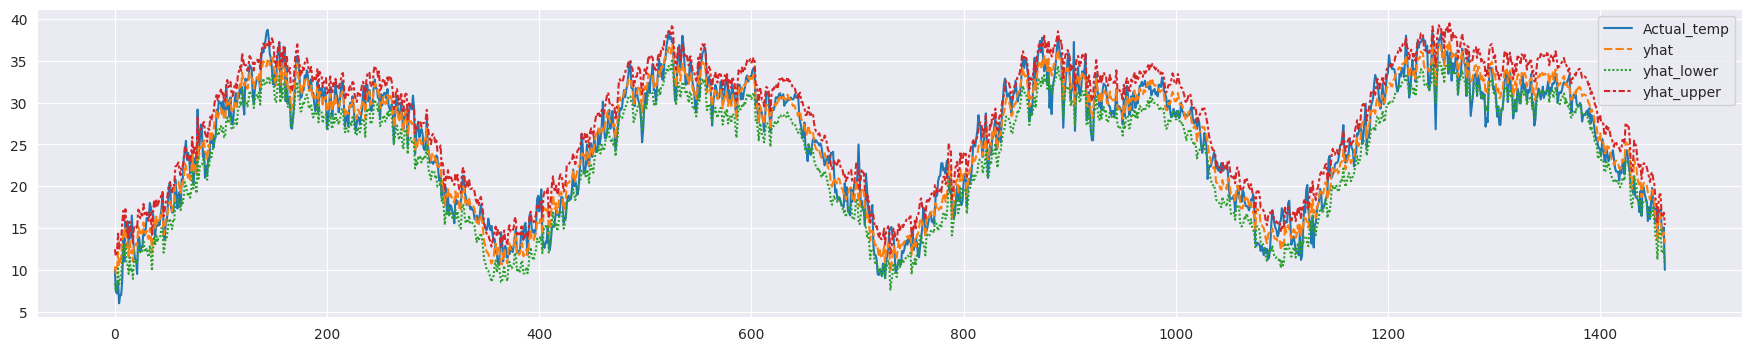

In [54]:
plt.figure(figsize=(22,4))
sns.lineplot(data = forecast[['Actual_temp', 'yhat', 'yhat_lower','yhat_upper']]);
# there isn't a big gap between yhat_lower and yhat_upper, so I can trust this model

## Detailed Analysis with plotly library:

In [55]:
from prophet.plot import plot_plotly
import plotly.offline as py

plot_plotly(prop_model, forecast)

# black -> actual
# blue -> predicted

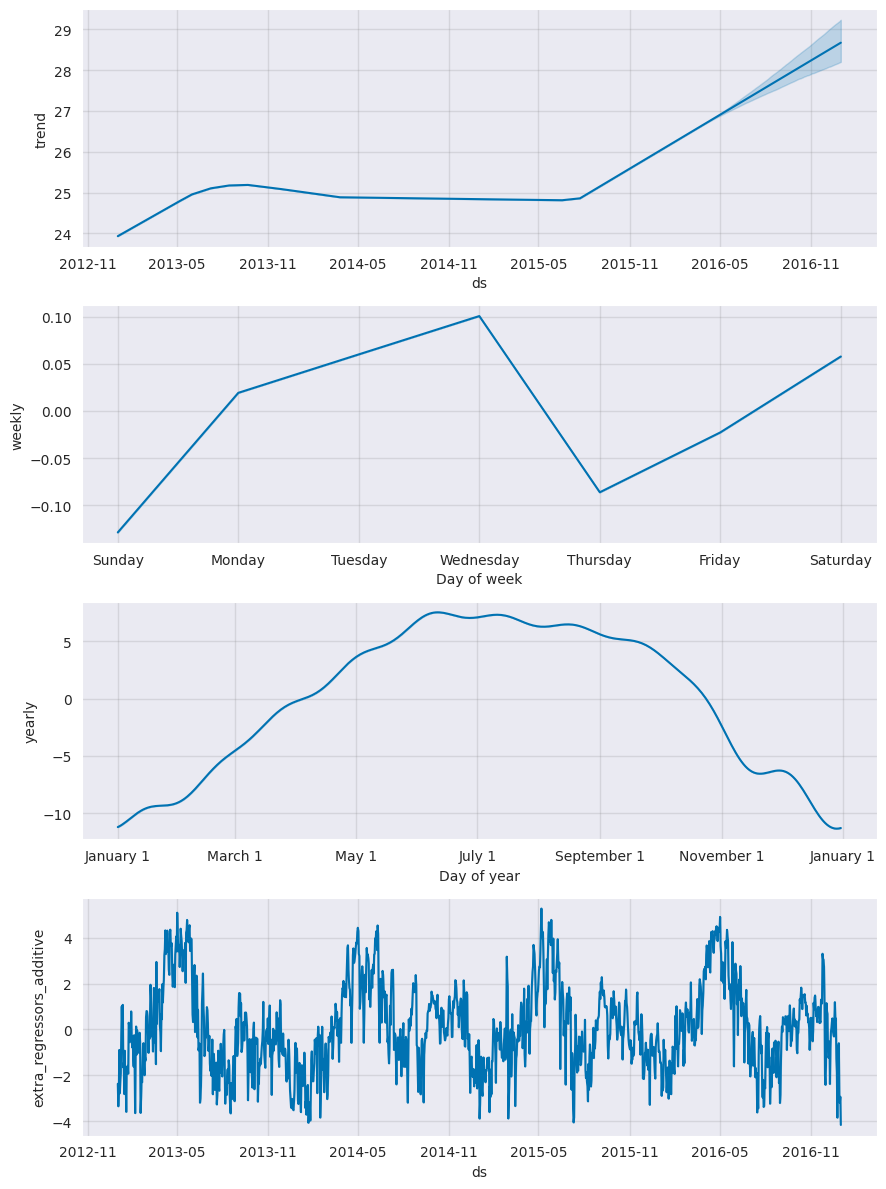

In [56]:
fig = prop_model.plot_components(forecast)

# <div style="color:white;display:inline-block;border-radius:50px;background-color:brown;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>7.3 Compare ARIMA-SARIMA-Prophet Models before Deep Learning Models </p></div>

In [57]:
display(test.head(2)) # test data from arima sarima models

display(p_test.head(2)) # test data of prophet model

meantemp  humidity  wind_speed  meantemp_diff
date                                                     
2016-03-15    24.067    58.933       8.647          1.692
2016-03-16    23.938    53.750      10.881         -0.129

ds      y  humidity  wind_speed
1169 2016-03-15 24.067    58.933       8.647
1170 2016-03-16 23.938    53.750      10.881

In [58]:
arima_pred # predictions of ARIMA

2016-03-15   22.826
2016-03-16   23.086
2016-03-17   23.235
2016-03-18   23.321
2016-03-19   23.370
              ...  
2016-12-28   23.437
2016-12-29   23.437
2016-12-30   23.437
2016-12-31   23.437
2017-01-01   23.437
Freq: D, Name: predicted_mean, Length: 293, dtype: float64

In [59]:
sarima_pred # predictions of SARIMA

2016-03-15   22.847
2016-03-16   23.079
2016-03-17   23.245
2016-03-18   23.086
2016-03-19   23.093
              ...  
2016-12-28   20.634
2016-12-29   20.174
2016-12-30   19.762
2016-12-31   19.373
2017-01-01   18.902
Freq: D, Name: predicted_mean, Length: 293, dtype: float64

In [60]:
predicted.head() # predictions of prophet

yhat
ds               
2016-03-15 24.504
2016-03-16 25.245
2016-03-17 25.792
2016-03-18 24.778
2016-03-19 25.083

In [61]:
pred_df = test.copy()  # copying test data from arima sarima models (for daily comparision)
pred_df.head()

meantemp  humidity  wind_speed  meantemp_diff
date                                                     
2016-03-15    24.067    58.933       8.647          1.692
2016-03-16    23.938    53.750      10.881         -0.129
2016-03-17    26.312    50.312       6.844          2.375
2016-03-18    26.188    61.250       6.713         -0.125
2016-03-19    26.786    61.857       3.579          0.598

In [62]:
display(m_test.head()) # monthly test data

m_test["arima_pred_m"] = arima_pred_m.values.round(2)
m_test["sarima_pred_m"] = sarima_pred_m.values.round(2)
m_test["auto_arima_pred"] = auto_arima_pred.values.round(2)

display(m_test.head())

meantemp  humidity  wind_speed  meantemp_diff
date                                                     
2016-04-30    32.550    29.244       9.687          0.102
2016-05-31    34.729    38.959       9.506         -0.014
2016-06-30    34.947    51.760       9.052          0.094
2016-07-31    30.876    75.430       6.207         -0.200
2016-08-31    31.117    72.993       7.168         -0.065

meantemp  humidity  wind_speed  meantemp_diff  arima_pred_m  \
date                                                                      
2016-04-30    32.550    29.244       9.687          0.102        25.310   
2016-05-31    34.729    38.959       9.506         -0.014        24.990   
2016-06-30    34.947    51.760       9.052          0.094        24.720   
2016-07-31    30.876    75.430       6.207         -0.200        24.500   
2016-08-31    31.117    72.993       7.168         -0.065        24.320   

            sarima_pred_m  auto_arima_pred  
date                                        
2016-04-30         30.690           28.700  
2016-05-31         32.250           32.910  
2016-06-30         33.090           34.550  
2016-07-31         30.240           31.990  
2016-08-31         30.000           31.610

In [63]:
# Adding predictions of ARIMA, SARIMA, and Prophet

pred_df["arima_pred"] = arima_pred.values.round(2)
pred_df["sarima_pred"] = sarima_pred.values.round(2)
pred_df["prophet_yhat"] = predicted["yhat"].values.round(2)

pred_df.head()

meantemp  humidity  wind_speed  meantemp_diff  arima_pred  \
date                                                                    
2016-03-15    24.067    58.933       8.647          1.692      22.830   
2016-03-16    23.938    53.750      10.881         -0.129      23.090   
2016-03-17    26.312    50.312       6.844          2.375      23.230   
2016-03-18    26.188    61.250       6.713         -0.125      23.320   
2016-03-19    26.786    61.857       3.579          0.598      23.370   

            sarima_pred  prophet_yhat  
date                                   
2016-03-15       22.850        24.500  
2016-03-16       23.080        25.250  
2016-03-17       23.250        25.790  
2016-03-18       23.090        24.780  
2016-03-19       23.090        25.080

In [64]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import math

prophet_mape = mean_absolute_percentage_error(pred_df["meantemp"].values, pred_df["prophet_yhat"].values)
prophet_r = r2_score(pred_df["meantemp"].values, pred_df["prophet_yhat"].values)
prophet_rmse = math.sqrt(mean_squared_error(pred_df["meantemp"].values, pred_df["prophet_yhat"].values))

arima_mape = mean_absolute_percentage_error(pred_df["meantemp"].values, pred_df["arima_pred"].values)
arima_r = r2_score(pred_df["meantemp"].values, pred_df["arima_pred"].values)
arima_rmse = math.sqrt(mean_squared_error(pred_df["meantemp"].values, pred_df["arima_pred"].values))

sarima_mape = mean_absolute_percentage_error(pred_df["meantemp"].values, pred_df["sarima_pred"].values)
sarima_r = r2_score(pred_df["meantemp"].values, pred_df["sarima_pred"].values)
sarima_rmse = math.sqrt(mean_squared_error(pred_df["meantemp"].values, pred_df["sarima_pred"].values))

######## monthly predictions #############

arima_mape_m = mean_absolute_percentage_error(m_test["meantemp"].values, m_test["arima_pred_m"].values)
arima_r_m = r2_score(m_test["meantemp"].values, m_test["arima_pred_m"].values)
arima_rmse_m = math.sqrt(mean_squared_error(m_test["meantemp"].values, m_test["arima_pred_m"].values))

sarima_mape_m = mean_absolute_percentage_error(m_test["meantemp"].values, m_test["sarima_pred_m"].values)
sarima_r_m = r2_score(m_test["meantemp"].values, m_test["sarima_pred_m"].values)
sarima_rmse_m = math.sqrt(mean_squared_error(m_test["meantemp"].values, m_test["sarima_pred_m"].values))

autoarima_mape_m = mean_absolute_percentage_error(m_test["meantemp"].values, m_test["auto_arima_pred"].values)
autoarima_r_m = r2_score(m_test["meantemp"].values, m_test["auto_arima_pred"].values)
autoarima_rmse_m = math.sqrt(mean_squared_error(m_test["meantemp"].values, m_test["auto_arima_pred"].values))

compare_df = {
        'Prophet daily': [prophet_mape,prophet_rmse,prophet_r], 
        'ARIMA daily': [arima_mape,arima_rmse,arima_r],
        'SARIMA daily': [sarima_mape,sarima_rmse,sarima_r],
        'ARIMA Monthly': [arima_mape_m,arima_rmse_m,arima_r_m], 
        'SARIMA Monthly': [sarima_mape_m,sarima_rmse_m,sarima_r_m],
        'autoARIMA Monthly': [autoarima_mape_m,autoarima_rmse_m,autoarima_r_m]
             }

compare_df = pd.DataFrame(compare_df,index=['MAE','RMSE','R2'])
compare_df

Prophet daily  ARIMA daily  SARIMA daily  ARIMA Monthly  SARIMA Monthly  \
MAE           0.052        0.245         0.143          0.339           0.080   
RMSE          1.718        8.100         4.803          8.034           1.942   
R2            0.908       -1.050         0.279         -0.077           0.937   

      autoARIMA Monthly  
MAE               0.096  
RMSE              2.250  
R2                0.915

# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b> </b> 8) Data Preprocessing Before Deep Learning Models </p></div>

In [65]:
gc.collect()

df.head()

meantemp  humidity  wind_speed
date                                      
2013-01-01    10.000    84.500       0.000
2013-01-02     7.400    92.000       2.980
2013-01-03     7.167    87.000       4.633
2013-01-04     8.667    71.333       1.233
2013-01-05     6.000    86.833       3.700

# <div style="color:white;display:inline-block;border-radius:50px;background-color:brown;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>8.1 Train Test Split </p></div>

In [66]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
dl_train, dl_test = df.iloc[:train_size], df.iloc[train_size:]
print(len(dl_train), len(dl_test))

1169 293


# <div style="color:white;display:inline-block;border-radius:50px;background-color:brown;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>8.2 Scaling </p></div>

## Which models require scaling? <br>

#### 1. ARIMA and SARIMA: 
These models typically do not require scaling because they work with the raw time series data. However, if your data has a wide range of values or if you're dealing with different scales across features, scaling might help improve model performance.

#### 2. Prophet: 
Prophet does not require scaling. It is robust to outliers and can handle non-stationary data directly.

#### 3. RNN, LSTM, and GRU: 
These models often benefit from scaling, especially if you are using activation functions like sigmoid or tanh, which are sensitive to the scale of the input data. Scaling helps stabilize training by putting all features on a similar scale, which can speed up convergence and prevent exploding gradients.

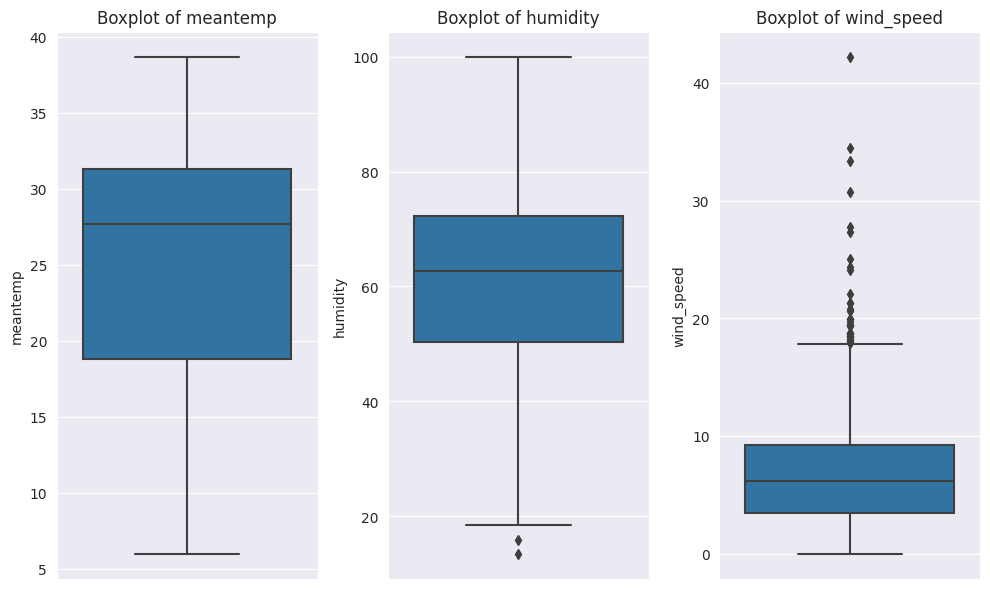

In [67]:
# find out what scaling to perform

f_columns = ['meantemp', 'humidity', 'wind_speed']
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1) 
sns.boxplot(y=df['meantemp'])
plt.title('Boxplot of meantemp')

plt.subplot(1, 3, 2) 
sns.boxplot(y=df['humidity'])
plt.title('Boxplot of humidity')

plt.subplot(1, 3, 3) 
sns.boxplot(y=df['wind_speed'])
plt.title('Boxplot of wind_speed')

plt.tight_layout() 
plt.show()

Applying: 

- MinMax scaling for meantemp and humidity
    - scaling the target meantemp separately


- Robust scaling for wind_speed

In [68]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

robust_scaler = RobustScaler()   # scaler for wind_speed
minmax_scaler = MinMaxScaler()  # scaler for humidity
target_transformer = MinMaxScaler()   # scaler for target (meantemp)

In [69]:
dl_train['wind_speed'] = robust_scaler.fit_transform(dl_train[['wind_speed']])  # robust for wind_speed
dl_train['humidity'] = minmax_scaler.fit_transform(dl_train[['humidity']]) # minmax for humidity
dl_train['meantemp'] = target_transformer.fit_transform(dl_train[['meantemp']]) # target

dl_test['wind_speed'] = robust_scaler.transform(dl_test[['wind_speed']])
dl_test['humidity'] = minmax_scaler.transform(dl_test[['humidity']])
dl_test['meantemp'] = target_transformer.transform(dl_test[['meantemp']])

In [70]:
display(df.head())
display(dl_train.head())

meantemp  humidity  wind_speed
date                                      
2013-01-01    10.000    84.500       0.000
2013-01-02     7.400    92.000       2.980
2013-01-03     7.167    87.000       4.633
2013-01-04     8.667    71.333       1.233
2013-01-05     6.000    86.833       3.700

meantemp  humidity  wind_speed
date                                      
2013-01-01     0.122     0.840      -1.018
2013-01-02     0.043     0.929      -0.496
2013-01-03     0.036     0.870      -0.207
2013-01-04     0.082     0.685      -0.802
2013-01-05     0.000     0.868      -0.370

# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b> </b> 9) SimpleRNN Model </p></div>

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping

def create_dataset(X, y, time_steps=1):  
    Xs, ys = [], []   
    for i in range(len(X) - time_steps):   
        v = X.iloc[i:(i + time_steps)].values 
        Xs.append(v)      
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)  

2024-05-25 05:05:05.931963: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-25 05:05:05.932111: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-25 05:05:06.096312: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


This function prepares the input features and target values in the format required for training a recurrent neural network (RNN) or LSTM model for sequential prediction tasks. It creates sequences of input features and their corresponding target values, which can be fed into the model during training.

- X: This parameter represents the input features, typically a pandas DataFrame containing multiple time-series variables such as temperature, humidity, etc.
- y: This parameter represents the target values, which are typically the values we want to predict based on the input features.
- time_steps: This parameter defines the length of each sequence. It determines how many data points from the past will be used to predict the next data point. For example, if time_steps is set to 3, the function will create sequences of three consecutive data points as input features and the next data point as the target value.

In [72]:
# Create sequences
sequence_length = 3  # Example sequence length (adjust based on your data and experimentation)
X_train, y_train = create_dataset(dl_train, dl_train['meantemp'], sequence_length)
X_test, y_test = create_dataset(dl_test, dl_test['meantemp'], sequence_length)

In [73]:
# Build the model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(100, activation='tanh', input_shape=(sequence_length, X_train.shape[2])))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = rnn_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=1, callbacks=[early_stopping])

# Evaluate the model
loss = rnn_model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}')

Epoch 1/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0525 - val_loss: 0.0055
Epoch 2/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0075 - val_loss: 0.0068
Epoch 3/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0053 - val_loss: 0.0059
Epoch 4/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0047 - val_loss: 0.0036
Epoch 5/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0039 - val_loss: 0.0043
Epoch 6/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0039 - val_loss: 0.0032
Epoch 7/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 8/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 9/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0035 - val_loss: 0.0040
Epoch 10/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0034 - val_loss: 0.0029
Epoch 11/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 12/30
1166/1166 ━━━━━━━━

In [74]:
# Make predictions
rnn_pred = rnn_model.predict(X_test)
rnn_pred = target_transformer.inverse_transform(rnn_pred)  # Inverse transform to original scale

# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)
y_test = target_transformer.inverse_transform(y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [75]:
# Calculate RMSE and R2 scores
rmse = np.sqrt(mean_squared_error(y_test, rnn_pred))
r2 = r2_score(y_test, rnn_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

RMSE: 1.6422993805070547
R2 Score: 0.9160405024041862


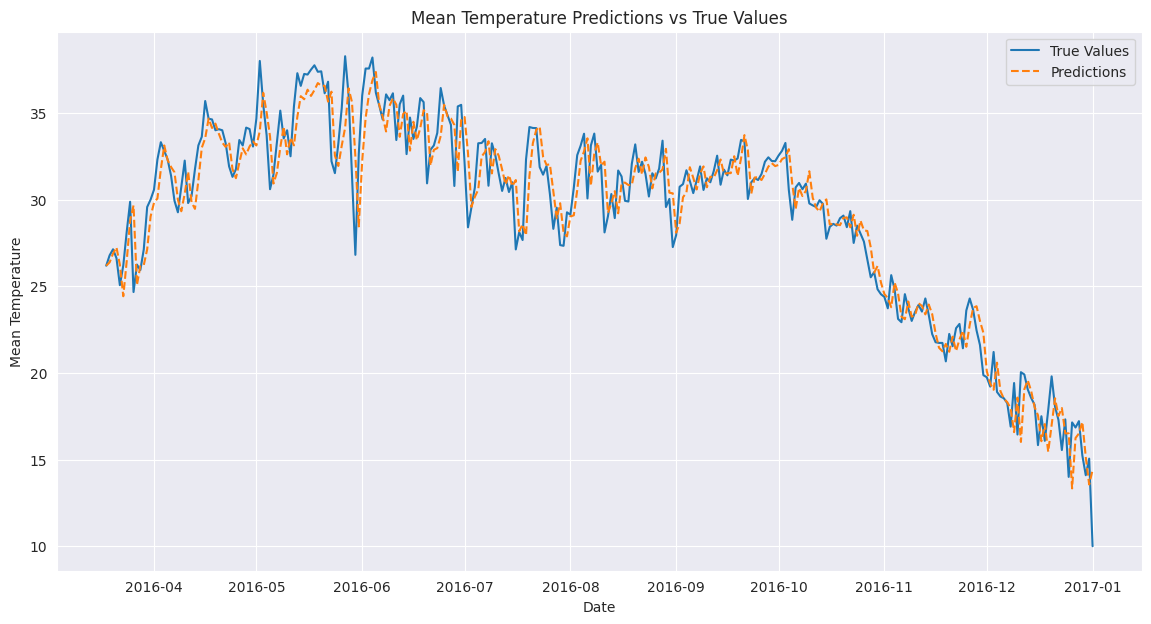

In [76]:
# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='True Values')
plt.plot(df.index[-len(y_test):], rnn_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Predictions vs True Values')
plt.legend()
plt.show()

In [77]:
rnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 100)            │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,505 (123.07 KB)

 Trainable params: 10,501 (41.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,004 (82.05 KB)

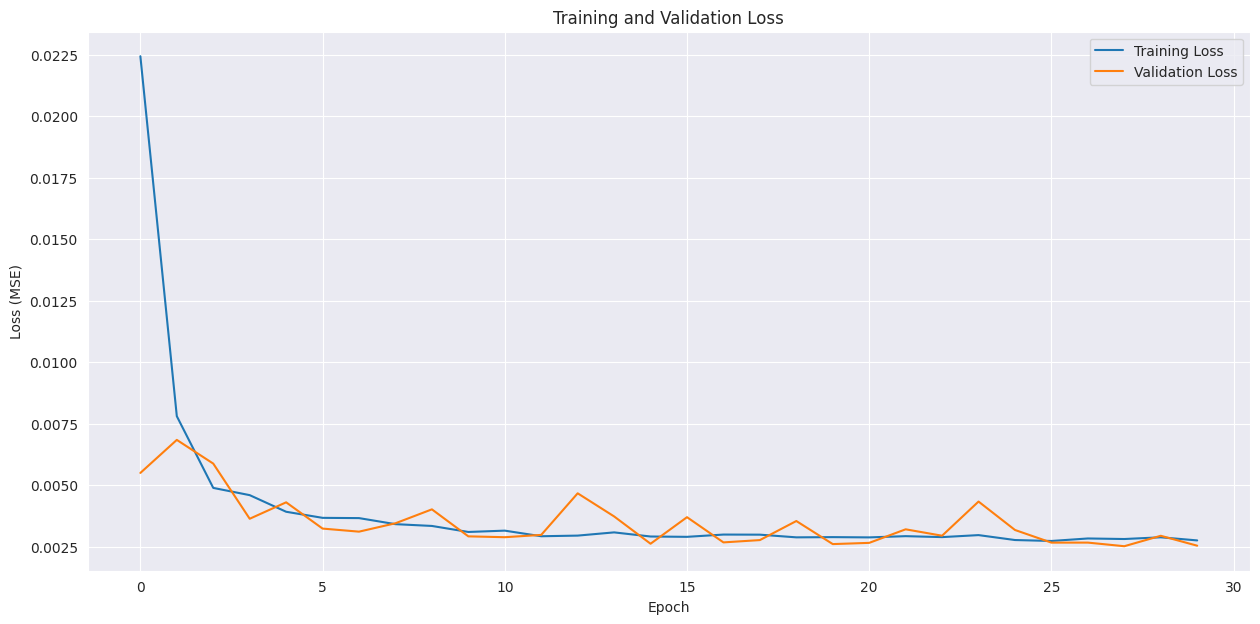

In [78]:
# Get training and validation losses from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot loss values over epochs
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### Parameter Tuning for RNN:

    tanh -> 

length 7, 50 neurons:

- RMSE: 1.7022050638627386
- R2 Score: 0.9107810517336425


length 7, 100 neurons:

- RMSE: 1.6977972058472743
- R2 Score: 0.9112425181993008
 
length 3, 100 neurons:

- RMSE: 1.6785269886734864
- R2 Score: 0.9122955094603048

length 3, 100 neurons, patience changed from 5 to 10:  **BEST**

- RMSE: 1.6496086733687276
- R2 Score: 0.9152914913407373
    
length 30, 100 neurons:
    
- RMSE: 1.893428742100526
- R2 Score: 0.8968513361685011
    

    relu -> 

length 7, 50 neurons

- RMSE: 1.7621630164518767
- R2 Score: 0.9043851149010912

# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b> </b> 10) LSTM Model</p></div>

In [79]:
sequence_length = 3  # Example sequence length (adjust based on your data and experimentation)
X_train, y_train = create_dataset(dl_train, dl_train['meantemp'], sequence_length)
X_test, y_test = create_dataset(dl_test, dl_test['meantemp'], sequence_length)

In [80]:
from tensorflow.keras.layers import LSTM

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(100, activation='tanh', input_shape=(sequence_length, X_train.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = lstm_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=1, callbacks=[early_stopping])

# Evaluate the model
loss = lstm_model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}')

Epoch 1/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0252 - val_loss: 0.0066
Epoch 2/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0042 - val_loss: 0.0031
Epoch 3/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0037 - val_loss: 0.0047
Epoch 4/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0039 - val_loss: 0.0028
Epoch 5/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0034 - val_loss: 0.0040
Epoch 6/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 7/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 8/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0031 - val_loss: 0.0027
Epoch 9/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0027 - val_loss: 0.0041
Epoch 10/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 11/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0034 - val_loss: 0.0027
Epoch 12/30
1166/1166 ━━━━━━━━

In [81]:
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        41,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,105 (488.70 KB)

 Trainable params: 41,701 (162.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 83,404 (325.80 KB)

In [82]:
# Make predictions
lstm_pred = lstm_model.predict(X_test)
lstm_pred = target_transformer.inverse_transform(lstm_pred)  # Inverse transform to original scale

# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)
y_test = target_transformer.inverse_transform(y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


RMSE: 1.6443274668884247
R2 Score: 0.9158330100871936


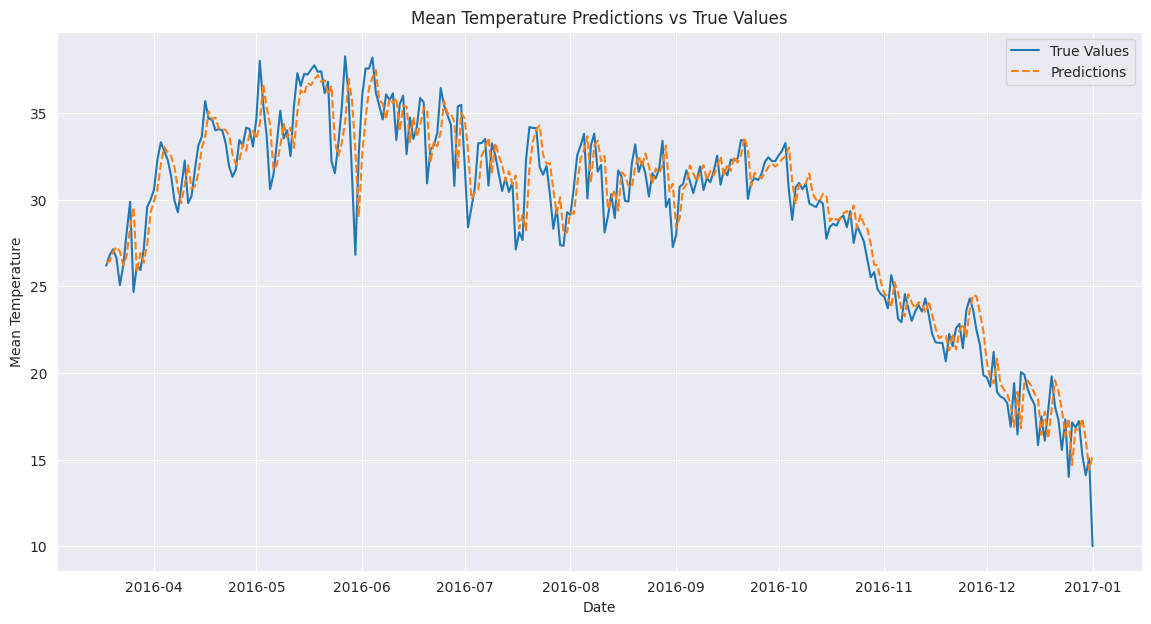

In [83]:
# Calculate RMSE and R2 scores
rmse = np.sqrt(mean_squared_error(y_test, lstm_pred))
r2 = r2_score(y_test, lstm_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='True Values')
plt.plot(df.index[-len(y_test):], lstm_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Predictions vs True Values')
plt.legend()
plt.show()

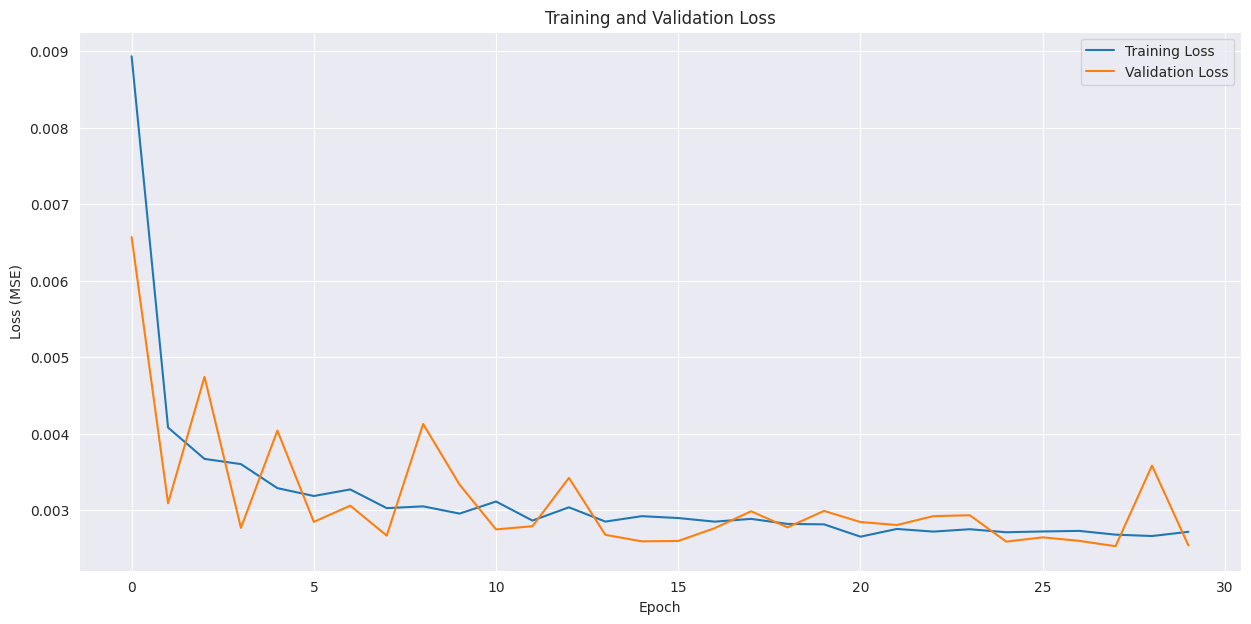

In [84]:
# Get training and validation losses from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot loss values over epochs
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

I also tried using TimeseriesGenerator() instead of the def function, and the results were:

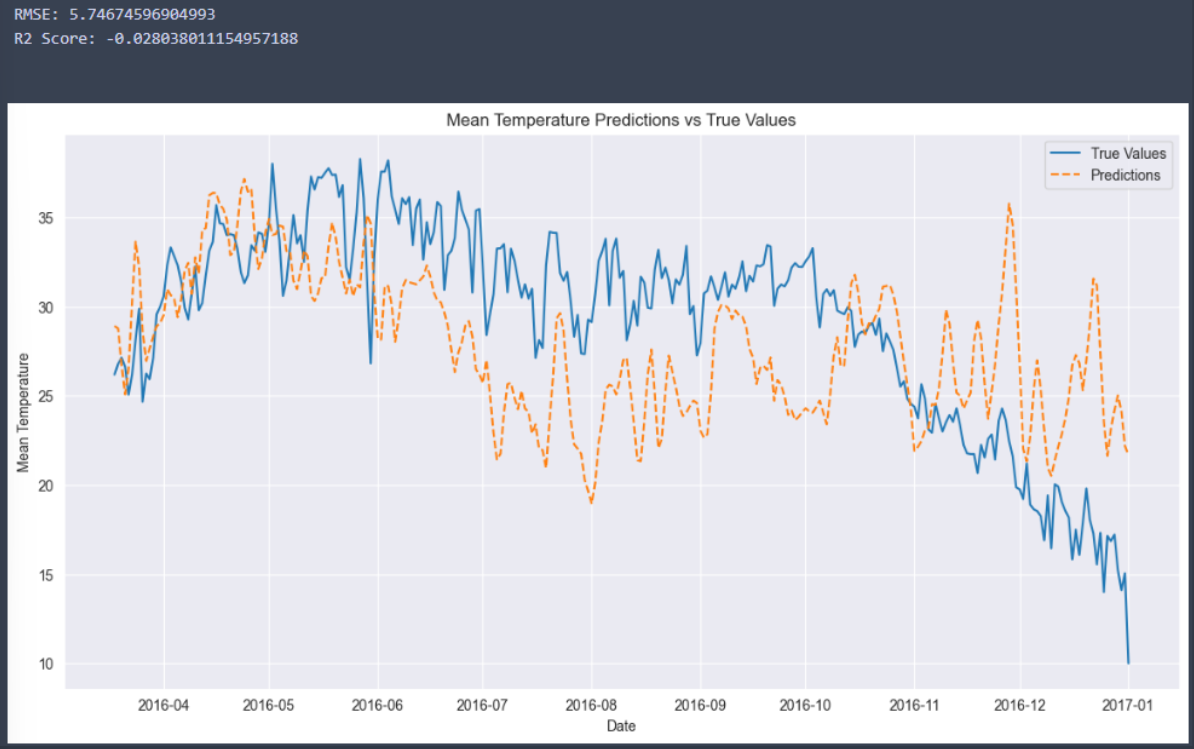

## Bidirectional LSTM

Bidirectional LSTMs are an extension of traditional LSTMs that can improve model performance on sequence classification problems.

In problems where all timesteps of the input sequence are available, Bidirectional LSTMs train two instead of one LSTMs on the input sequence. The first on the input sequence as-is and the second on a reversed copy of the input sequence. This can provide additional context to the network and result in faster and even fuller learning on the problem.

In [85]:
# Create sequences
sequence_length = 3  # Example sequence length (adjust based on your data and experimentation)
X_train, y_train = create_dataset(dl_train, dl_train['meantemp'], sequence_length)
X_test, y_test = create_dataset(dl_test, dl_test['meantemp'], sequence_length)

In [86]:
from tensorflow.keras.layers import LSTM, Bidirectional

# Build the bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(100, activation='tanh', input_shape=(sequence_length, X_train.shape[2]))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=1, callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}')

Epoch 1/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0235 - val_loss: 0.0036
Epoch 2/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 3/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 4/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0040 - val_loss: 0.0030
Epoch 5/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 6/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0032 - val_loss: 0.0045
Epoch 7/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0031 - val_loss: 0.0034
Epoch 8/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 9/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0031 - val_loss: 0.0027
Epoch 10/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0033 - val_loss: 0.0026
Epoch 11/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 12/30
1166/1166 ━━━━━━━━

In [87]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (1, 200)               │        83,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (1, 1)                 │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,205 (977.37 KB)

 Trainable params: 83,401 (325.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 166,804 (651.58 KB)

In [88]:
# Make predictions
bilstm_pred = model.predict(X_test)
bilstm_pred = target_transformer.inverse_transform(bilstm_pred)  # Inverse transform to original scale

# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)
y_test = target_transformer.inverse_transform(y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


RMSE: 1.6369413687967571
R2 Score: 0.9165874454862084


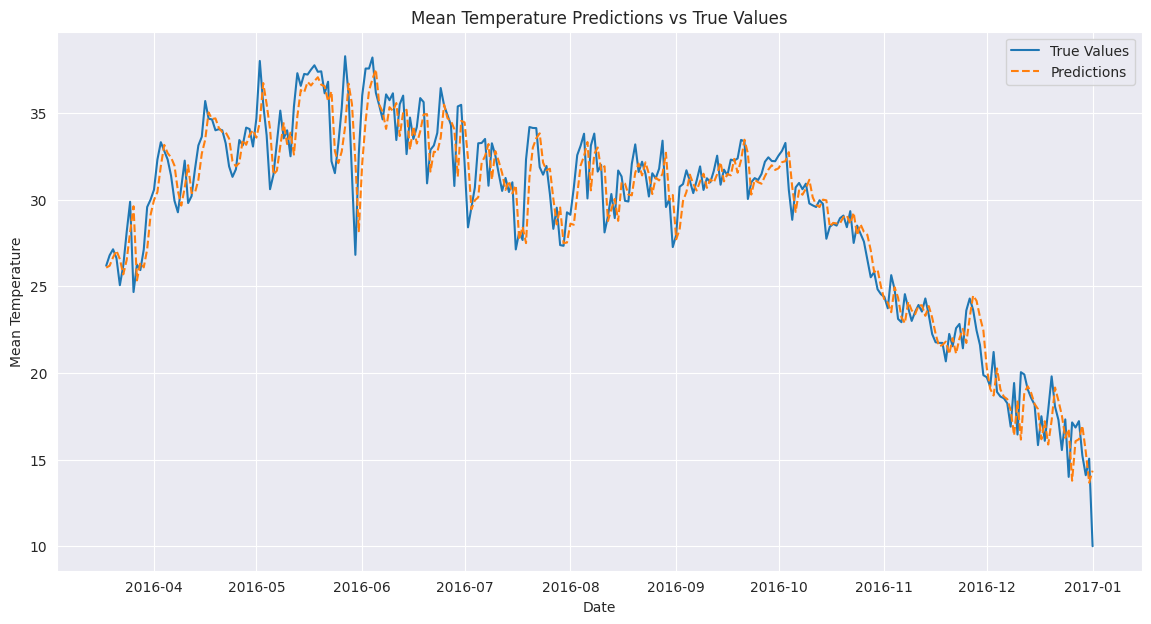

In [89]:
# Calculate RMSE and R2 scores
rmse = np.sqrt(mean_squared_error(y_test, bilstm_pred))
r2 = r2_score(y_test, bilstm_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='True Values')
plt.plot(df.index[-len(y_test):], bilstm_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Predictions vs True Values')
plt.legend()
plt.show()

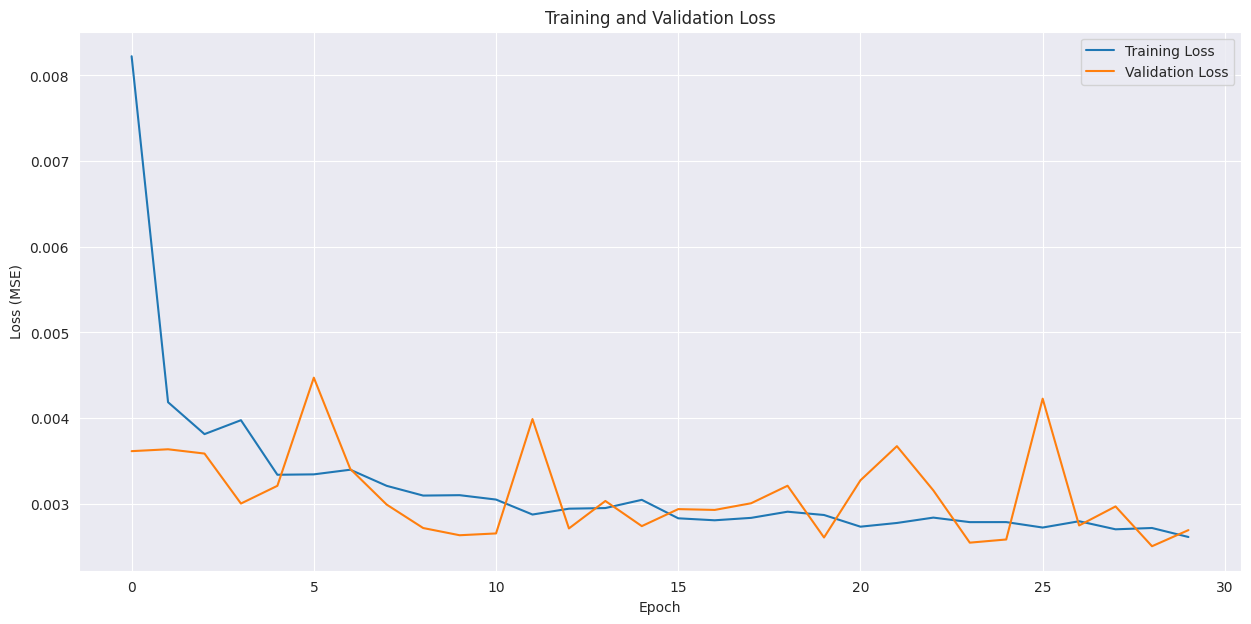

In [90]:
# Get training and validation losses from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot loss values over epochs
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b> </b> 11) GRU Model</p></div>

In [91]:
# Create sequences
sequence_length = 3  # Example sequence length (adjust based on your data and experimentation)
X_train, y_train = create_dataset(dl_train, dl_train['meantemp'], sequence_length)
X_test, y_test = create_dataset(dl_test, dl_test['meantemp'], sequence_length)

In [92]:
from tensorflow.keras.layers import GRU

# Build the GRU model
gru_model = Sequential()
gru_model.add(GRU(100, activation='tanh', input_shape=(sequence_length, X_train.shape[2])))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = gru_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=1, callbacks=[early_stopping])

# Evaluate the model
loss = gru_model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}')

Epoch 1/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0201 - val_loss: 0.0034
Epoch 2/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0039 - val_loss: 0.0032
Epoch 3/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0034 - val_loss: 0.0054
Epoch 4/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 5/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 6/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 7/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0030 - val_loss: 0.0041
Epoch 8/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0033 - val_loss: 0.0028
Epoch 9/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 10/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0029 - val_loss: 0.0038
Epoch 11/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 12/30
1166/1166 ━━━━━━━━

In [93]:
gru_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 100)            │        31,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,805 (370.34 KB)

 Trainable params: 31,601 (123.44 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,204 (246.89 KB)

In [94]:
# Make predictions
gru_pred = gru_model.predict(X_test)
gru_pred = target_transformer.inverse_transform(gru_pred)  # Inverse transform to original scale

# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)
y_test = target_transformer.inverse_transform(y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


RMSE: 1.6484800200706953
R2 Score: 0.9154073658902296


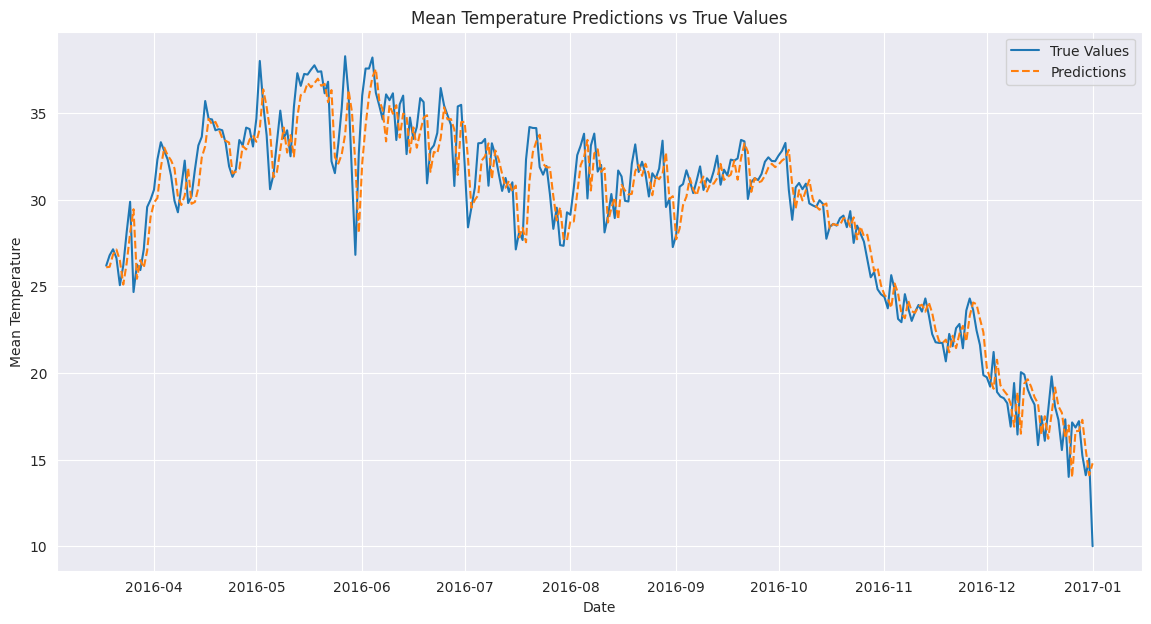

In [95]:
# Calculate RMSE and R2 scores
rmse = np.sqrt(mean_squared_error(y_test, gru_pred))
r2 = r2_score(y_test, gru_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='True Values')
plt.plot(df.index[-len(y_test):], gru_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Predictions vs True Values')
plt.legend()
plt.show()

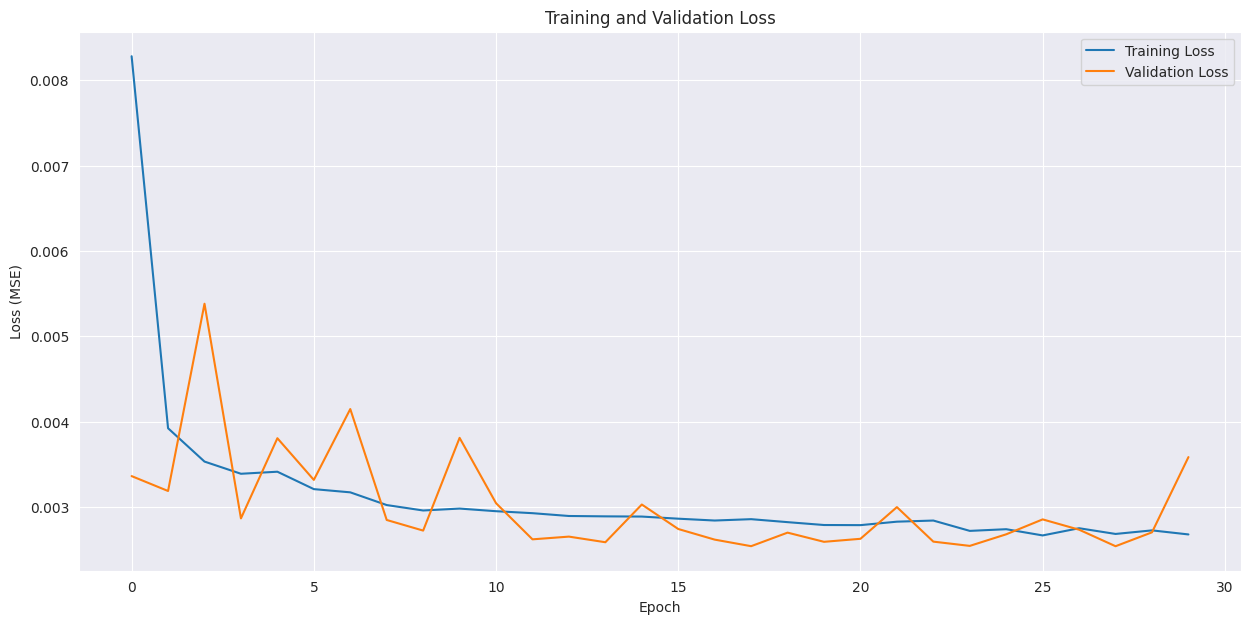

In [96]:
# Get training and validation losses from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot loss values over epochs
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### All three Deep Learning model has approximately the same performance

Now lets compare all the models so far.

# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b> </b> 12) Compare Models (daily forecast) </p></div>

In [97]:
display(pred_df.head())
display(compare_df.head())

meantemp  humidity  wind_speed  meantemp_diff  arima_pred  \
date                                                                    
2016-03-15    24.067    58.933       8.647          1.692      22.830   
2016-03-16    23.938    53.750      10.881         -0.129      23.090   
2016-03-17    26.312    50.312       6.844          2.375      23.230   
2016-03-18    26.188    61.250       6.713         -0.125      23.320   
2016-03-19    26.786    61.857       3.579          0.598      23.370   

            sarima_pred  prophet_yhat  
date                                   
2016-03-15       22.850        24.500  
2016-03-16       23.080        25.250  
2016-03-17       23.250        25.790  
2016-03-18       23.090        24.780  
2016-03-19       23.090        25.080

Prophet daily  ARIMA daily  SARIMA daily  ARIMA Monthly  SARIMA Monthly  \
MAE           0.052        0.245         0.143          0.339           0.080   
RMSE          1.718        8.100         4.803          8.034           1.942   
R2            0.908       -1.050         0.279         -0.077           0.937   

      autoARIMA Monthly  
MAE               0.096  
RMSE              2.250  
R2                0.915

In [98]:
rnn_mape = mean_absolute_percentage_error(y_test, rnn_pred)
rnn_r = r2_score(y_test, rnn_pred)
rnn_rmse = math.sqrt(mean_squared_error(y_test, rnn_pred))

lstm_mape = mean_absolute_percentage_error(y_test, lstm_pred)
lstm_r = r2_score(y_test, lstm_pred)
lstm_rmse = math.sqrt(mean_squared_error(y_test, lstm_pred))

bilstm_mape = mean_absolute_percentage_error(y_test, bilstm_pred)
bilstm_r = r2_score(y_test, bilstm_pred)
bilstm_rmse = math.sqrt(mean_squared_error(y_test, bilstm_pred))

gru_mape = mean_absolute_percentage_error(y_test, gru_pred)
gru_r = r2_score(y_test, gru_pred)
gru_rmse = math.sqrt(mean_squared_error(y_test, gru_pred))

dl_compare = {
        'RNN daily': [rnn_mape,rnn_rmse,rnn_r], 
        'LSTM daily': [lstm_mape,lstm_rmse,lstm_r],
        'BiLSTM daily': [bilstm_mape,bilstm_rmse,bilstm_r],
        'GRU daily': [gru_mape,gru_rmse,gru_r]
             }

dl_compare = pd.DataFrame(dl_compare,index=['MAE','RMSE','R2'])

# Concatenate dl_compare with compare_df
compare_models_df = pd.concat([compare_df, dl_compare], axis=1)
compare_models_df

Prophet daily  ARIMA daily  SARIMA daily  ARIMA Monthly  SARIMA Monthly  \
MAE           0.052        0.245         0.143          0.339           0.080   
RMSE          1.718        8.100         4.803          8.034           1.942   
R2            0.908       -1.050         0.279         -0.077           0.937   

      autoARIMA Monthly  RNN daily  LSTM daily  BiLSTM daily  GRU daily  
MAE               0.096      0.045       0.046         0.045      0.046  
RMSE              2.250      1.642       1.644         1.637      1.648  
R2                0.915      0.916       0.916         0.917      0.915

In [99]:
compare_models_df.columns

Index(['Prophet daily', 'ARIMA daily', 'SARIMA daily', 'ARIMA Monthly',
       'SARIMA Monthly', 'autoARIMA Monthly', 'RNN daily', 'LSTM daily',
       'BiLSTM daily', 'GRU daily'],
      dtype='object')

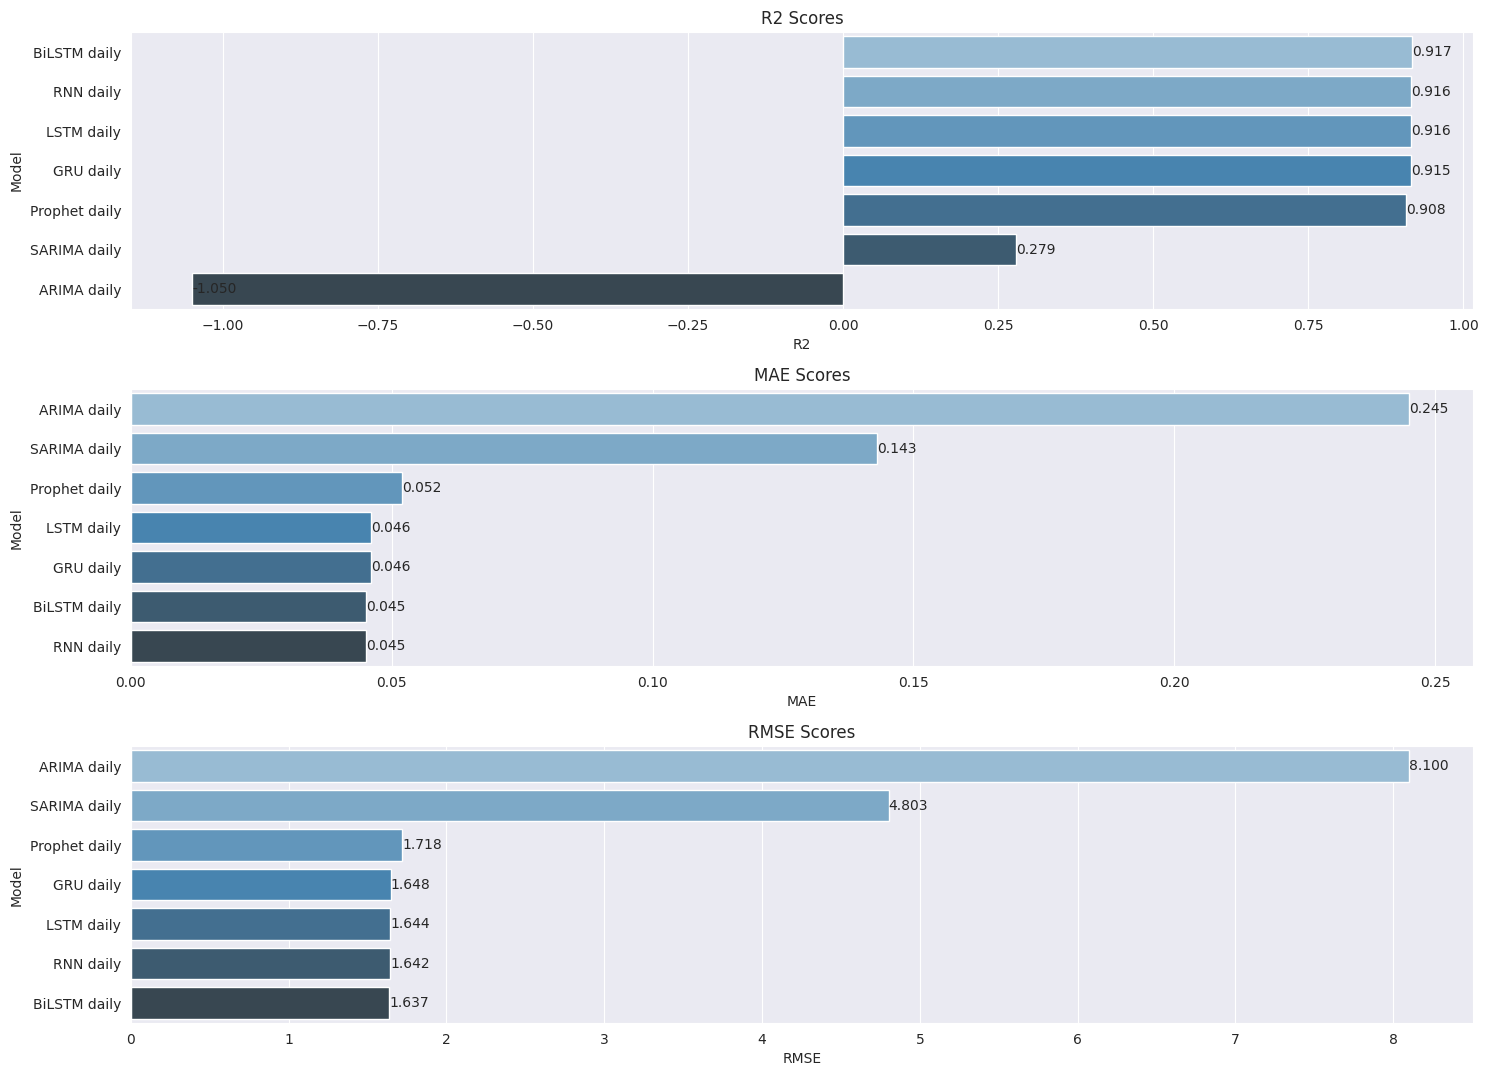

In [101]:
data = {
    'Model': ['Prophet daily', 'ARIMA daily', 'SARIMA daily', 'RNN daily', 'LSTM daily', 'BiLSTM daily', 'GRU daily'],
    'MAE': [0.052, 0.245, 0.143, 0.045, 0.046, 0.045, 0.046],
    'RMSE': [1.718, 8.100, 4.803, 1.642, 1.644, 1.637, 1.648],
    'R2': [0.908, -1.050, 0.279, 0.916, 0.916, 0.917, 0.915]
}

compare = pd.DataFrame(data)

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        
        ax.text(width,                              
                p.get_y() + p.get_height() / 2,     
                '{:.3f}'.format(width),             
                ha='left',                         
                va='center')  

plt.figure(figsize=(15, 14))

plt.subplot(411)
compare = compare.sort_values(by="R2", ascending=False)
ax = sns.barplot(x="R2", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.title('R2 Scores')

plt.subplot(412)
compare = compare.sort_values(by="MAE", ascending=False)
ax = sns.barplot(x="MAE", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.title('MAE Scores')

plt.subplot(413)
compare = compare.sort_values(by="RMSE", ascending=False)
ax = sns.barplot(x="RMSE", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.title('RMSE Scores')

plt.tight_layout()
plt.show()

# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b> </b> 15) Conclusion </p></div>

After exploring various time series models in detail and leveraging advanced visualizations, I've concluded that Prophet is my preferred choice among the other models. Despite testing over 6 models in a multivariate time series, Prophet's simplicity, performance, and cost-effectiveness make it the standout solution.

I have found that Prophet is able to deliver comparable results to deep learning models without the complexity and resource-intensive training they require. Unlike traditional ARIMA models, it offers a user-friendly interface and requires minimal parameter tuning, making it accessible to users with varying levels of expertise. Also, Prophet's robustness to outliers and its ability to handle irregularly spaced data add to its appeal.

Thanks to everyone for reviewing this notebook! I would appreciate an upvote if you liked it. Also, I'm curious about your thoughts, so please leave a comment to help me improve.